# Анализ метрик мобильного приложения

## Описание проекта и данных

Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Что мне предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта,
`orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

## Технический код

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
# Добавление элементов форматирования текста

class color:
   BOLD = '\033[1m'
   GREEN = '\033[92m'
   RED = '\033[91m'
   END = '\033[0m'

## Загрузка и предобработка данных

In [3]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),
    pd.read_csv('orders_info_short.csv'),
    pd.read_csv('costs_info_short.csv')
)

In [4]:
# Выведение общей информации о загруженных данных

for i in [visits, orders, costs]:
    display(i),
    i.info()

User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**ВЫВОД**

Явных пропусков в данных нет. Типы данных требуют уточнения.

In [5]:
for df in [visits, orders, costs]:
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

In [6]:
# Преобразование столбцов с датами в формат даты

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [7]:
# Выведение информации о явных дубликатах и количестве уникальных значений в каждом столбце

for df in [visits, orders, costs]:
    print(color.BOLD, "\nЯвные Дубликаты:", color.END, df.duplicated().sum()),
    print(color.BOLD, "\nУникальные значения:", color.END)
    print(df.nunique())

 
Явные Дубликаты:  0
 
Уникальные значения: 
user_id          150008
region                4
device                4
channel              11
session_start    306813
session_end      306793
dtype: int64
 
Явные Дубликаты:  0
 
Уникальные значения: 
user_id      8881
event_dt    40163
revenue         5
dtype: int64
 
Явные Дубликаты:  0
 
Уникальные значения: 
dt         180
channel     10
costs      610
dtype: int64


**ВЫВОДЫ**

Явных дубликатов в данных нет.

In [8]:
# Выведение уникальных значений столбцов для лучшего понимания структуры данных

for df in [visits, orders, costs]:
    for col in df:
        print(f"{col}:")
        unique_values = df[col].unique()
        if isinstance(unique_values, np.ndarray):  # Проверяем, массив ли это
            unique_values = np.sort(unique_values)  # Используем numpy для сортировки
        display(unique_values)

user_id:


array([      599326,      4919697,      6085896, ..., 999976332130,
       999979924135, 999999563947])

region:


array(['France', 'Germany', 'UK', 'United States'], dtype=object)

device:


array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

channel:


array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

session_start:


<DatetimeArray>
['2019-05-01 02:36:01', '2019-05-01 04:46:31', '2019-05-01 14:09:25',
 '2019-05-01 00:29:59', '2019-05-01 03:33:35', '2019-05-01 07:14:52',
 '2019-05-01 09:03:21', '2019-05-01 09:37:03', '2019-05-01 10:26:00',
 '2019-05-01 04:39:53',
 ...
 '2019-10-31 17:12:29', '2019-10-31 01:26:31', '2019-10-31 07:07:13',
 '2019-10-31 11:38:01', '2019-10-31 11:14:15', '2019-10-31 13:28:12',
 '2019-10-31 22:14:52', '2019-10-31 01:40:48', '2019-10-31 07:37:34',
 '2019-10-31 14:17:43']
Length: 306813, dtype: datetime64[ns]

session_end:


<DatetimeArray>
['2019-05-01 02:45:01', '2019-05-01 04:47:35', '2019-05-01 15:32:08',
 '2019-05-01 00:54:25', '2019-05-01 03:57:40', '2019-05-01 08:19:56',
 '2019-05-01 10:08:39', '2019-05-01 10:00:43', '2019-05-01 10:59:17',
 '2019-05-01 04:57:05',
 ...
 '2019-10-31 00:54:39', '2019-10-31 17:15:11', '2019-10-31 01:39:21',
 '2019-10-31 07:38:52', '2019-10-31 11:50:29', '2019-10-31 14:39:29',
 '2019-10-31 22:39:36', '2019-10-31 01:41:31', '2019-10-31 07:37:55',
 '2019-10-31 15:17:04']
Length: 306793, dtype: datetime64[ns]

user_id:


array([      599326,     46006712,    374052872, ..., 999659859721,
       999779032958, 999895427370])

event_dt:


<DatetimeArray>
['2019-05-01 23:09:52', '2019-05-01 12:24:04', '2019-05-01 11:34:04',
 '2019-05-01 15:34:40', '2019-05-01 13:59:51', '2019-05-01 01:56:28',
 '2019-05-01 02:39:21', '2019-05-01 02:02:18', '2019-05-01 03:39:47',
 '2019-05-01 18:16:50',
 ...
 '2019-10-31 15:19:00', '2019-10-31 21:45:38', '2019-10-31 18:49:29',
 '2019-10-31 09:38:22', '2019-10-31 03:23:40', '2019-10-31 16:19:07',
 '2019-10-31 01:17:17', '2019-10-31 06:17:29', '2019-10-31 22:46:19',
 '2019-10-31 13:29:06']
Length: 40163, dtype: datetime64[ns]

revenue:


array([ 4.99,  5.99,  9.99, 19.99, 49.99])

dt:


<DatetimeArray>
['2019-05-01 00:00:00', '2019-05-02 00:00:00', '2019-05-03 00:00:00',
 '2019-05-04 00:00:00', '2019-05-05 00:00:00', '2019-05-06 00:00:00',
 '2019-05-07 00:00:00', '2019-05-08 00:00:00', '2019-05-09 00:00:00',
 '2019-05-10 00:00:00',
 ...
 '2019-10-18 00:00:00', '2019-10-19 00:00:00', '2019-10-20 00:00:00',
 '2019-10-21 00:00:00', '2019-10-22 00:00:00', '2019-10-23 00:00:00',
 '2019-10-24 00:00:00', '2019-10-25 00:00:00', '2019-10-26 00:00:00',
 '2019-10-27 00:00:00']
Length: 180, dtype: datetime64[ns]

channel:


array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

costs:


array([  0.8  ,   1.26 ,   1.44 ,   1.6  ,   1.62 ,   1.8  ,   1.92 ,
         1.98 ,   2.16 ,   2.34 ,   2.4  ,   2.4  ,   2.52 ,   2.64 ,
         2.7  ,   2.73 ,   2.73 ,   2.75 ,   2.88 ,   2.925,   2.94 ,
         3.   ,   3.06 ,   3.12 ,   3.15 ,   3.2  ,   3.24 ,   3.36 ,
         3.42 ,   3.5  ,   3.57 ,   3.575,   3.6  ,   3.75 ,   3.78 ,
         3.84 ,   3.9  ,   3.96 ,   3.99 ,   4.   ,   4.08 ,   4.095,
         4.14 ,   4.2  ,   4.225,   4.25 ,   4.32 ,   4.41 ,   4.5  ,
         4.55 ,   4.56 ,   4.62 ,   4.68 ,   4.75 ,   4.8  ,   4.8  ,
         4.83 ,   4.86 ,   5.   ,   5.04 ,   5.13 ,   5.22 ,   5.25 ,
         5.28 ,   5.4  ,   5.4  ,   5.46 ,   5.46 ,   5.5  ,   5.52 ,
         5.525,   5.58 ,   5.6  ,   5.67 ,   5.75 ,   5.76 ,   5.85 ,
         5.88 ,   5.915,   5.94 ,   6.   ,   6.175,   6.24 ,   6.25 ,
         6.3  ,   6.37 ,   6.4  ,   6.435,   6.48 ,   6.48 ,   6.5  ,
         6.51 ,   6.6  ,   6.72 ,   6.75 ,   6.825,   6.825,   6.9  ,
         6.96 ,   7.

**ВЫВОДЫ**

- Данные представлены за период с `1 мая 2019 года` по `31 октября 2019` включительно.
- Данные представлены для 4 стран пользователей: `США, Германия, Франция, Великобритания`.
- Данные представлены для 4 типов устройства пользователей: `PC, Mac, Android, iPhone`.
- Данные представлены для 10 рекламных источников: `AdNonSense, FaceBoom, LeapBob, MediaTornado, OppleCreativeMedia, RocketSuperAds, TipTop, WahooNetBanner, YRabbit, lambdaMediaAds`.
- Величина суммы заказа принимает следующие значения: `4.99,  5.99,  9.99, 19.99, 49.99`.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания пользовательских профилей

In [9]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M')  # Исправлено

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем стоимость привлечения в профили
    # подготавливаем данные о рекламных расходах
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date  # Убедимся, что формат даты совпадает

    # считаем количество уникальных пользователей
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчёта удержания

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



## Исследовательский анализ данных

### Составление профиля пользователей. Определение минимальной и максимальной даты привлечения пользователей

In [17]:
# Получаем профили пользователей

profiles = get_profiles(visits, orders, costs)

profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt    month  payer  acquisition_cost  
0       2019-05-07  2019-05   True          1.088172  
1       2019-07-09  2019-07  False          1.107237  
2       2019-10-01  2019-10  False          0.000000  
3       2019-08-22  2019-08  False          0.988235  
4       2019-10-02  2019-10  False          0.230769  
...            ...      ...    ...               ...  
150003  2019-09-28  2019-09  False          3.500000  
150004  2019-10-21  2019-10  False          0.000000  
150005  2019-07-23  2019-07  False          2.600000  
150006  2019-09-28  2019-09  False          0.205714  
150007  2019-10-18  2019-10  False          0.000000  

[150008 rows x 9 columns]

In [18]:
# Находим минимальную и максимальную даты привлечения пользователей

print(f"Минимальная дата привлечения пользователей: {profiles['first_ts'].min()}")
print(f"Максимальная дата привлечения пользователей: {profiles['first_ts'].max()}")

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


**ВЫВОДЫ**

Период привлечения пользователей соответствуют предварительной информациии – с 1 мая по 27 октября 2019 года.

### Выяснение, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны

In [19]:
# Подсчитываем общее количество пользователей и платящих пользователей по странам
region_stats = profiles.groupby('region')['payer'].agg(total_users='count', paying_users='sum').reset_index()

# Рассчитываем долю пользователей по странам
region_stats['user_share_of_total'] = (region_stats['total_users'] / region_stats['total_users'].sum() * 100).round(1)

# Рассчитываем долю платящих пользователей по странам
region_stats['paying_share_of_total'] = (region_stats['paying_users'] / region_stats['paying_users'].sum() * 100).round(1)

# Рассчитываем долю платящих пользователей в каждой стране
region_stats['paying_share_by_region'] = (region_stats['paying_users'] / region_stats['total_users'] * 100).round(1)

# Добавляем расчет средней стоимости привлечения пользователя по странам
region_stats['average_acquisition_cost'] = region_stats['region'].map(profiles.groupby('region')['acquisition_cost'].mean()).round(2)

# Сортируем данные по убыванию доли платящих пользователей
region_stats = region_stats.sort_values(by='paying_share_by_region', ascending=False)

# Устанавливаем 'region' как индекс таблицы
region_stats = region_stats.set_index('region')

# Добавляем итоговую строку для общего количества пользователей и платящих пользователей
totals = region_stats[['total_users', 'paying_users']].sum()
totals.name = 'TOTAL / Weighted AVG'

# Для столбцов с процентами создаем функцию, которая будет их пересчитывать для итоговой строки
def recalculate_percentages(total, column):
    return (column / total * 100).round(1)

# Вычисляем итоговые проценты для столбцов 'user_share_of_total' и 'paying_share_of_total'
totals['user_share_of_total'] = recalculate_percentages(totals['total_users'], totals['total_users'])
totals['paying_share_of_total'] = recalculate_percentages(totals['paying_users'], totals['paying_users'])

# Добавляем среднюю взвешенную долю привлечённых пользователей по странам
totals['paying_share_by_region'] = ((region_stats['paying_share_by_region'] * region_stats['total_users']).sum() / region_stats['total_users'].sum()).round(2)

# Добавляем среднюю взвешенную стоимость привлечения пользователя
totals['average_acquisition_cost'] = ((region_stats['average_acquisition_cost'] * region_stats['total_users']).sum() / region_stats['total_users'].sum()).round(2)

# Добавляем итоговую строку к DataFrame
region_stats = pd.concat([region_stats, pd.DataFrame([totals])])

region_stats

total_users  paying_users  user_share_of_total  \
United States            100002.0        6902.0                 66.7   
Germany                   14981.0         616.0                 10.0   
UK                        17575.0         700.0                 11.7   
France                    17450.0         663.0                 11.6   
TOTAL / Weighted AVG     150008.0        8881.0                100.0   

                      paying_share_of_total  paying_share_by_region  \
United States                          77.7                    6.90   
Germany                                 6.9                    4.10   
UK                                      7.9                    4.00   
France                                  7.5                    3.80   
TOTAL / Weighted AVG                  100.0                    5.92   

                      average_acquisition_cost  
United States                             0.91  
Germany                                   0.30  
UK                                        0.29  
France                                    0.29  
TOTAL / Weighted AVG                      0.70

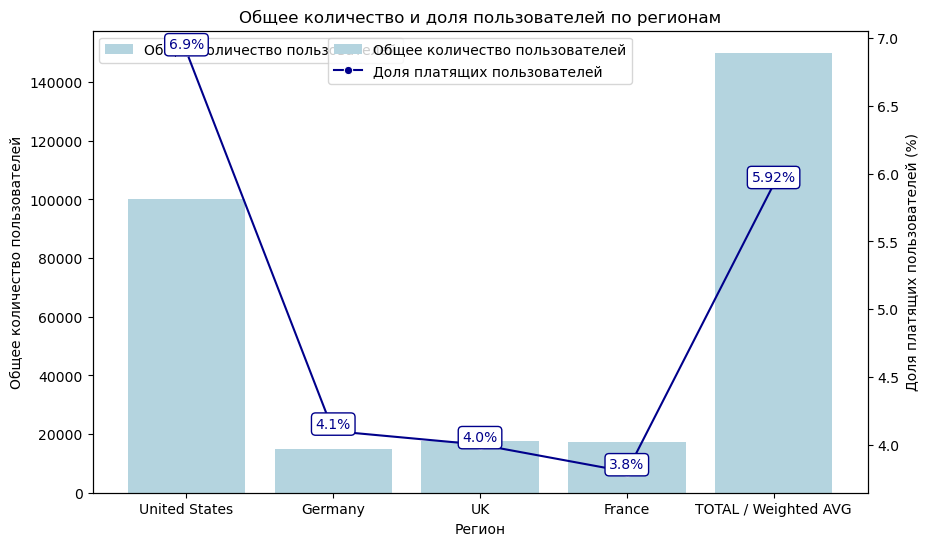

In [20]:
# Создаем фигуру и оси для графика
fig, ax1 = plt.subplots(figsize=(10, 6))

# Генерируем столбиковую диаграмму для общего количества пользователей
sns.barplot(x=region_stats.index,
            y='total_users',
            data=region_stats,
            ax=ax1,
            color='lightblue',
            label='Общее количество пользователей')

# Создаем вторую ось для линейного графика
ax2 = ax1.twinx()

# Генерируем линейный график для процента платящих пользователей
sns.lineplot(x=region_stats.index,
             y='paying_share_by_region',
             data=region_stats,
             ax=ax2,
             color='darkblue',
             marker='o',
             label='Доля платящих пользователей')

ax1.set_title('Общее количество и доля пользователей по регионам')
ax1.set_xlabel('Регион')
ax1.set_ylabel('Общее количество пользователей')
ax2.set_ylabel('Доля платящих пользователей (%)')

# Добавляем метки для paying_share
for x, y in zip(region_stats.index, region_stats['paying_share_by_region']):
    ax2.text(x, y, f'{y}%', color='darkblue', ha='center', va='bottom',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='darkblue'))

# Устанавливаем легенду
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

plt.show()

**ВЫВОДЫ**

1. **Общее количество пользователей**: США являются крупнейшим рынком с точки зрения общего количества пользователей, в то время как Германия имеет наименьшее количество пользователей из представленных стран.

2. **Платящие пользователи**: Аналогично, большинство платящих пользователей находятся в США, что делает этот рынок наиболее прибыльным. Однако важно отметить, что не просто общее количество пользователей делает рынок ценным, но и процент платящих пользователей от общего числа.

3. **Доля пользователей от общего числа**: США составляют большую часть пользователей (66.7%), в то время как другие страны распределены относительно равномерно между 10% и 11.7%.

4. **Доля платящих пользователей от общего числа**: США также имеют самую высокую долю платящих пользователей (77.7%). Это указывает на то, что американский рынок не только велик, но и пользователи склонны тратить деньги.

5. **Доля платящих пользователей по регионам**: США имеют наивысший процент платящих пользователей среди всех пользователей в данной стране (6.9%), что еще раз подчеркивает их значимость для бизнеса.

6. **Средняя стоимость привлечения пользователя**: Стоимость привлечения пользователя в США самая высокая (0.91), что может быть связано с более высокой конкуренцией или стоимостью рекламы. В то же время, Германия, Великобритания и Франция имеют гораздо более низкую среднюю стоимость привлечения пользователя.

Основываясь на этих данных, можно сделать вывод, что США являются ключевым рынком для бизнеса, и вкладывая средства в привлечение и удержание пользователей на этом рынке, *можно ожидать* более высокую отдачу от инвестиций, несмотря на более высокую стоимость привлечения каждого пользователя. В то же время, на других рынках, несмотря на более низкую стоимость привлечения, доля платящих пользователей также ниже.

### Выяснение, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства

In [21]:
# Подсчитываем общее количество пользователей и платящих пользователей по устройствам
device_stats = profiles.groupby('device')['payer'].agg(total_users='count', paying_users='sum').reset_index()

# Рассчитываем долю пользователей по устройствам
device_stats['user_share_of_total'] = (device_stats['total_users'] / device_stats['total_users'].sum() * 100).round(1)

# Рассчитываем долю платящих пользователей по устройствам
device_stats['paying_share_of_total'] = (device_stats['paying_users'] / device_stats['paying_users'].sum() * 100).round(1)

# Рассчитываем долю платящих пользователей на каждом устройстве
device_stats['paying_share_by_device'] = (device_stats['paying_users'] / device_stats['total_users'] * 100).round(1)

# Добавляем расчет средней стоимости привлечения пользователя по устройствам
device_stats['average_acquisition_cost'] = device_stats['device'].map(profiles.groupby('device')['acquisition_cost'].mean()).round(2)

# Сортируем данные по убыванию доли платящих пользователей
device_stats = device_stats.sort_values(by='paying_share_by_device', ascending=False)

# Устанавливаем 'device' как индекс таблицы
device_stats = device_stats.set_index('device')

# Добавляем итоговую строку для общего количества пользователей и платящих пользователей
totals = device_stats[['total_users', 'paying_users']].sum()
totals.name = 'TOTAL / Weighted AVG'

# Для столбцов с процентами создаем функцию, которая будет их пересчитывать для итоговой строки
def recalculate_percentages(total, column):
    return (column / total * 100).round(1)

# Вычисляем итоговые проценты для столбцов 'user_share_of_total' и 'paying_share_of_total'
totals['user_share_of_total'] = recalculate_percentages(totals['total_users'], totals['total_users'])
totals['paying_share_of_total'] = recalculate_percentages(totals['paying_users'], totals['paying_users'])

# Добавляем среднюю взвешенную долю платящих пользователей по устройствам
totals['paying_share_by_device'] = ((device_stats['paying_share_by_device'] * device_stats['total_users']).sum() / device_stats['total_users'].sum()).round(2)

# Добавляем среднюю взвешенную стоимость привлечения пользователя
totals['average_acquisition_cost'] = ((device_stats['average_acquisition_cost'] * device_stats['total_users']).sum() / device_stats['total_users'].sum()).round(2)

# Добавляем итоговую строку к DataFrame
device_stats = pd.concat([device_stats, pd.DataFrame([totals])])

device_stats

total_users  paying_users  user_share_of_total  \
Mac                       30042.0        1912.0                 20.0   
iPhone                    54479.0        3382.0                 36.3   
Android                   35032.0        2050.0                 23.4   
PC                        30455.0        1537.0                 20.3   
TOTAL / Weighted AVG     150008.0        8881.0                100.0   

                      paying_share_of_total  paying_share_by_device  \
Mac                                    21.5                    6.40   
iPhone                                 38.1                    6.20   
Android                                23.1                    5.90   
PC                                     17.3                    5.00   
TOTAL / Weighted AVG                  100.0                    5.93   

                      average_acquisition_cost  
Mac                                       0.80  
iPhone                                    0.80  
Android                                   0.64  
PC                                        0.50  
TOTAL / Weighted AVG                      0.70

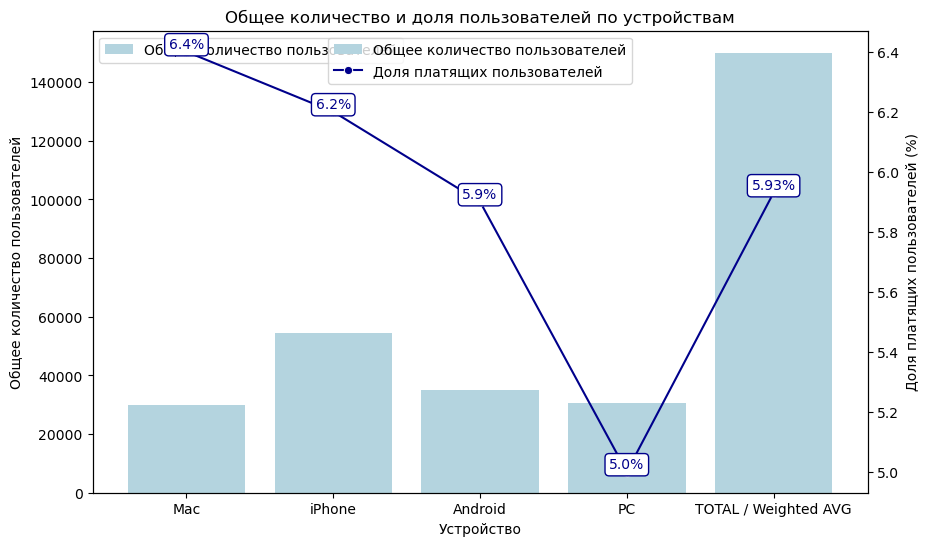

In [22]:
# Создаем фигуру и оси для графика
fig, ax1 = plt.subplots(figsize=(10, 6))

# Генерируем столбиковую диаграмму для общего количества пользователей по устройствам
sns.barplot(x=device_stats.index,
            y='total_users',
            data=device_stats,
            ax=ax1,
            color='lightblue',
            label='Общее количество пользователей')

# Создаем вторую ось для линейного графика
ax2 = ax1.twinx()

# Генерируем линейный график для процента платящих пользователей по устройствам
sns.lineplot(x=device_stats.index,
             y='paying_share_by_device',  # Обновлено на 'paying_share_by_device'
             data=device_stats,
             ax=ax2,
             color='darkblue',
             marker='o',
             label='Доля платящих пользователей')

ax1.set_title('Общее количество и доля пользователей по устройствам')  # Обновлено название
ax1.set_xlabel('Устройство')  # Обновлена подпись оси X
ax1.set_ylabel('Общее количество пользователей')
ax2.set_ylabel('Доля платящих пользователей (%)')

# Добавляем метки для paying_share
for x, y in zip(device_stats.index, device_stats['paying_share_by_device']):  # Обновлено на 'paying_share_by_device'
    ax2.text(x, y, f'{y}%', color='darkblue', ha='center', va='bottom',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='darkblue'))

# Устанавливаем легенду
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

plt.show()

**ВЫВОДЫ**

1. **Общее количество пользователей по устройствам**: Большинство пользователей предпочитают iPhone, за ним следуют устройства на Android и PC с почти одинаковым количеством пользователей, и наименьшее количество пользователей у Mac.

2. **Платящие пользователи**: Несмотря на то что пользователей iPhone больше, пользователи Mac и Android платят примерно одинаково, что выше, чем у пользователей PC.

3. **Доля пользователей от общего числа**: iPhone занимает более трети всех пользователей (36.3%), в то время как доля пользователей Mac, Android и PC составляет около 20%.

4. **Доля платящих пользователей от общего числа**: Самая высокая доля платящих пользователей среди пользователей iPhone (38.1%), что может указывать на более высокую платежеспособность или лояльность пользователей продуктов Apple.

5. **Доля платящих пользователей по устройствам**: Процент платящих пользователей самый высокий у пользователей Mac (6.4%) и iPhone (6.2%), что может указывать на более успешную монетизацию на этих платформах. Доля платящих пользователей у Android и PC ниже, что может свидетельствовать о различиях в покупательской способности или предпочтениях пользователей разных платформ.

6. **Средняя стоимость привлечения пользователя**: Средняя стоимость привлечения пользователя наименьшая для PC (0.50) и Android (0.64), что может делать эти платформы привлекательными для масштабирования пользователям с ограниченным бюджетом. При этом стоимость привлечения пользователей Mac и iPhone выше (0.80).

В целом, данные показывают, что хотя пользователи iPhone составляют самую большую часть аудитории, пользователи Mac также представляют значительную ценность из-за их высокой конверсии в платящих пользователей. Это подчеркивает важность не только количества пользователей, но и их качества, а также способности платформы привлечь платящих клиентов.

### Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения

In [23]:
# Подсчитываем общее количество пользователей и платящих пользователей по каналам
channel_stats = profiles.groupby('channel')['payer'].agg(total_users='count', paying_users='sum').reset_index()

# Рассчитываем долю пользователей по каналам
channel_stats['user_share_of_total'] = (channel_stats['total_users'] / channel_stats['total_users'].sum() * 100).round(1)

# Рассчитываем долю платящих пользователей по каналам
channel_stats['paying_share_of_total'] = (channel_stats['paying_users'] / channel_stats['paying_users'].sum() * 100).round(1)

# Рассчитываем долю платящих пользователей в каждом канале
channel_stats['paying_share_by_channel'] = (channel_stats['paying_users'] / channel_stats['total_users'] * 100).round(1)

# Добавляем расчет средней стоимости привлечения пользователя по каналам
channel_stats['average_acquisition_cost'] = channel_stats['channel'].map(profiles.groupby('channel')['acquisition_cost'].mean()).round(2)

# Сортируем данные по убыванию доли платящих пользователей
channel_stats = channel_stats.sort_values(by='paying_share_by_channel', ascending=False)

# Устанавливаем 'channel' как индекс таблицы
channel_stats = channel_stats.set_index('channel')

# Добавляем итоговую строку для общего количества пользователей и платящих пользователей
totals = channel_stats[['total_users', 'paying_users']].sum()
totals.name = 'TOTAL / Weighted AVG'

# Для столбцов с процентами создаем функцию, которая будет их пересчитывать для итоговой строки
def recalculate_percentages(total, column):
    return (column / total * 100).round(1)

# Вычисляем итоговые проценты для столбцов 'user_share_of_total' и 'paying_share_of_total'
totals['user_share_of_total'] = recalculate_percentages(totals['total_users'], totals['total_users'])
totals['paying_share_of_total'] = recalculate_percentages(totals['paying_users'], totals['paying_users'])

# Добавляем среднюю взвешенную долю платящих пользователей по каналам
totals['paying_share_by_channel'] = ((channel_stats['paying_share_by_channel'] * channel_stats['total_users']).sum() / channel_stats['total_users'].sum()).round(2)

# Добавляем среднюю взвешенную стоимость привлечения пользователя
totals['average_acquisition_cost'] = ((channel_stats['average_acquisition_cost'] * channel_stats['total_users']).sum() / channel_stats['total_users'].sum()).round(2)

# Добавляем итоговую строку к DataFrame
channel_stats = pd.concat([channel_stats, pd.DataFrame([totals])])

channel_stats

total_users  paying_users  user_share_of_total  \
FaceBoom                  29144.0        3557.0                 19.4   
AdNonSense                 3880.0         440.0                  2.6   
lambdaMediaAds             2149.0         225.0                  1.4   
TipTop                    19561.0        1878.0                 13.0   
RocketSuperAds             4448.0         352.0                  3.0   
WahooNetBanner             8553.0         453.0                  5.7   
YRabbit                    4312.0         165.0                  2.9   
MediaTornado               4364.0         156.0                  2.9   
LeapBob                    8553.0         262.0                  5.7   
OppleCreativeMedia         8605.0         233.0                  5.7   
organic                   56439.0        1160.0                 37.6   
TOTAL / Weighted AVG     150008.0        8881.0                100.0   

                      paying_share_of_total  paying_share_by_channel  \
FaceBoom                               40.1                    12.20   
AdNonSense                              5.0                    11.30   
lambdaMediaAds                          2.5                    10.50   
TipTop                                 21.1                     9.60   
RocketSuperAds                          4.0                     7.90   
WahooNetBanner                          5.1                     5.30   
YRabbit                                 1.9                     3.80   
MediaTornado                            1.8                     3.60   
LeapBob                                 3.0                     3.10   
OppleCreativeMedia                      2.6                     2.70   
organic                                13.1                     2.10   
TOTAL / Weighted AVG                  100.0                     5.94   

                      average_acquisition_cost  
FaceBoom                                  1.11  
AdNonSense                                1.01  
lambdaMediaAds                            0.72  
TipTop                                    2.80  
RocketSuperAds                            0.41  
WahooNetBanner                            0.60  
YRabbit                                   0.22  
MediaTornado                              0.22  
LeapBob                                   0.21  
OppleCreativeMedia                        0.25  
organic                                   0.00  
TOTAL / Weighted AVG                      0.70

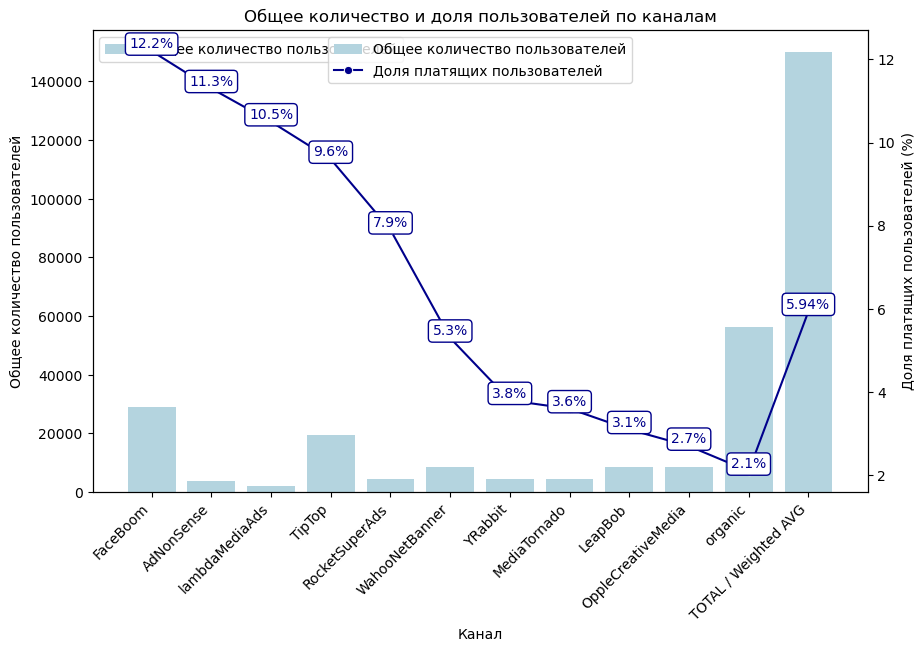

In [24]:
# Создаем фигуру и оси для графика
fig, ax1 = plt.subplots(figsize=(10, 6))

# Генерируем столбиковую диаграмму для общего количества пользователей по каналам
sns.barplot(x=channel_stats.index,
            y='total_users',
            data=channel_stats,
            ax=ax1,
            color='lightblue',
            label='Общее количество пользователей')

# Создаем вторую ось для линейного графика
ax2 = ax1.twinx()

# Генерируем линейный график для процента платящих пользователей по каналам
sns.lineplot(x=channel_stats.index,
             y='paying_share_by_channel',  # Обновлено на 'paying_share_by_channel'
             data=channel_stats,
             ax=ax2,
             color='darkblue',
             marker='o',
             label='Доля платящих пользователей')

ax1.set_title('Общее количество и доля пользователей по каналам')  # Обновлено название
ax1.set_xlabel('Канал')  # Обновлена подпись оси X
ax1.set_ylabel('Общее количество пользователей')
ax2.set_ylabel('Доля платящих пользователей (%)')

# Добавляем метки для paying_share_by_channel
for x, y in zip(channel_stats.index, channel_stats['paying_share_by_channel']):  # Обновлено на 'paying_share_by_channel'
    ax2.text(x, y, f'{y}%', color='darkblue', ha='center', va='bottom',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='darkblue'))

# Устанавливаем легенду
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

# Изменям наклон подписей горизонтальной оси
ax1.set_xticks(range(len(channel_stats.index)))
ax1.set_xticklabels(channel_stats.index, rotation=45, ha="right")

plt.show()

**ВЫВОДЫ**

1. **FaceBoom и органический трафик являются ведущими каналами**: Эти каналы обеспечивают наибольшую долю общего количества пользователей и платящих пользователей. Это подчеркивает их значимость как эффективных средств привлечения пользователей и их конвертации в платящих клиентов.

2. **Эффективность органического трафика**: Органический трафик, не требующий затрат на привлечение (средняя стоимость привлечения равна 0), имеет существенную долю в общем числе пользователей (37.6%) и значительную долю платящих пользователей (13.1%), что делает его особенно ценным для бизнеса.

3. **Конверсия в платящих пользователей**: FaceBoom, имея значительную долю общего числа пользователей (19.4%), также выделяется самой высокой долей платящих пользователей (40.1%), что указывает на его высокую монетизационную эффективность.

4. **Стоимость привлечения**: Каналы FaceBoom и TipTop отличаются высокой средней стоимостью привлечения пользователей, что может отражать их успешность в привлечении качественного трафика, несмотря на более высокие затраты.

5. **Средний показатель по каналам**: Общее взвешенное среднее показывает, что средний процент платящих пользователей по всем каналам составляет 5.94%, а средняя стоимость привлечения пользователя — 0.70. Эти показатели можно использовать в качестве бенчмарка для оценки производительности различных маркетинговых каналов.

## Маркетинг

In [25]:
# Подсчитываем общую сумму расходов на маркетинг

costs['costs'].sum()

105497.30000000002

### Распределение расходов на рекламу по каналам рекламы

In [26]:
# Выводим распределение расходов по рекламным источникам

costs_by_channel = costs.groupby('channel')['costs'].sum().reset_index()
costs_by_channel.sort_values(by='costs', ascending=False, inplace=True)
costs_by_channel['share'] = (costs_by_channel['costs'] / costs_by_channel['costs'].sum()) * 100
costs_by_channel = costs_by_channel.style.format({'share': '{:.2f}%'})

costs_by_channel

**ВЫВОДЫ**

Два канала, TipTop и FaceBoom, занимают 83% всех рекламных расходов. Остальные 8 каналов занимают лишь 17%.

### Визуализация динамики изменения расходов во времени

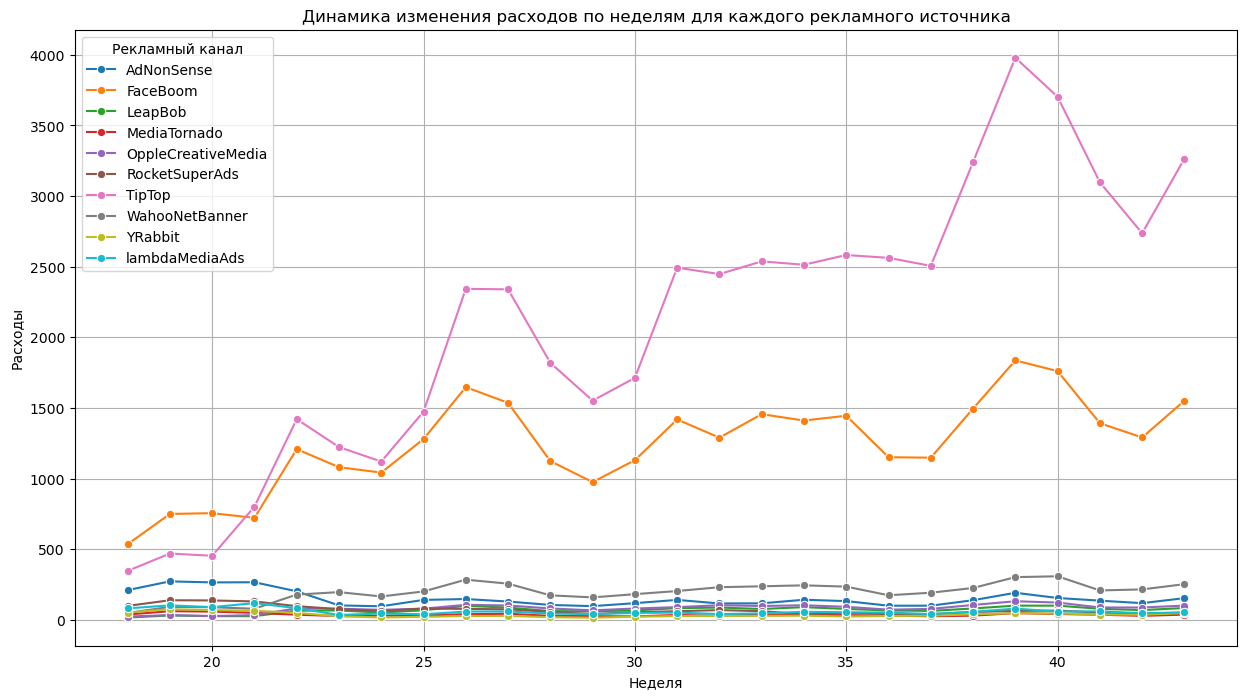

In [27]:
# Преобразовываем столбец 'dt' в datetime после работы функции get_profiles
costs['dt'] = pd.to_datetime(costs['dt'])

# Группируем данные по неделе и каналу с суммированием расходов
costs['week'] = costs['dt'].dt.isocalendar().week
weekly_costs = costs.groupby(['week', 'channel'])['costs'].sum().reset_index()

# Построение графика
plt.figure(figsize=(15, 8))
sns.lineplot(data=weekly_costs, x='week', y='costs', hue='channel', marker='o')
plt.title('Динамика изменения расходов по неделям для каждого рекламного источника')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.grid(True)
plt.legend(title='Рекламный канал')
plt.show()

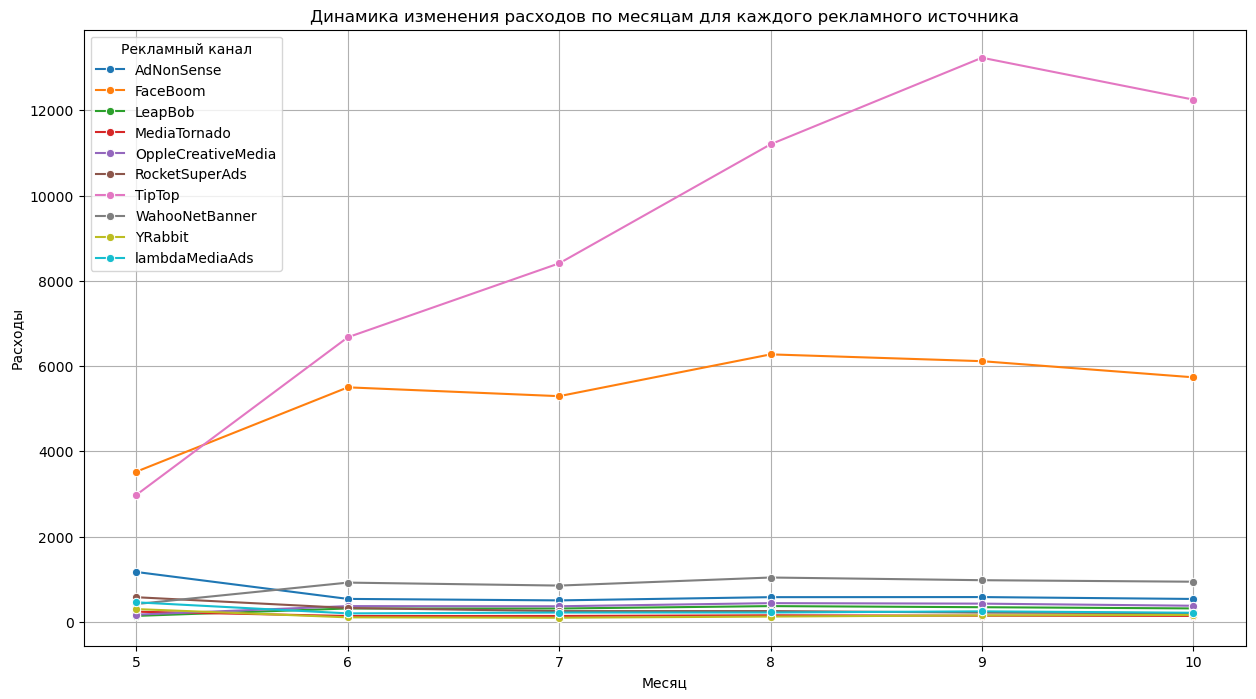

In [28]:
# Добавляем столбец с номером месяца
costs['month'] = costs['dt'].dt.month

# Группируем данные по месяцу и каналу с суммированием расходов
monthly_costs = costs.groupby(['month', 'channel'])['costs'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_costs, x='month', y='costs', hue='channel', marker='o')
plt.title('Динамика изменения расходов по месяцам для каждого рекламного источника')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.grid(True)
plt.legend(title='Рекламный канал')
plt.show()

**ВЫВОДЫ**

Понедельный и помесячный график подчёркивают объём расходов на первые два канала. На протяжении всего графика можно заметить один подход к формированию рекламных затрат: затраты на TipTop и FaceBoom меняются пропорционально и однонаправленно и постоянно растут, в то время как затраты на остальные каналы остаются на низком уровне.

### CAC

In [29]:
# Рассчитываем среднюю стоимость привлечения пользователя (CAC) по каждому источнику
cac_by_channel = profiles.groupby('channel')['acquisition_cost'].mean().reset_index().sort_values(by='acquisition_cost', ascending=False)

cac_by_channel

channel  acquisition_cost
6               TipTop          2.799003
1             FaceBoom          1.113286
0           AdNonSense          1.008054
9       lambdaMediaAds          0.724802
7       WahooNetBanner          0.602245
5       RocketSuperAds          0.412095
4   OppleCreativeMedia          0.250000
8              YRabbit          0.218975
3         MediaTornado          0.218717
2              LeapBob          0.210172
10             organic          0.000000

**ВЫВОДЫ**

Канал TipTop имеет самую высокую среднюю стоимость привлечения пользователя (CAC), за ним следует FaceBoom и AdNonSense. Остальные каналы демонстрируют низкий CAC.

## Оценка окупаемости рекламы

In [30]:
# Допущения для анализа

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [31]:
# убираем органический трафик пользователей из анализа,
# так как привлечение таких пользователей является условно бесплатным

filtered_profiles = profiles[profiles['channel'] != 'organic']

### Анализ окупаемости рекламы c помощью графиков LTV и ROI

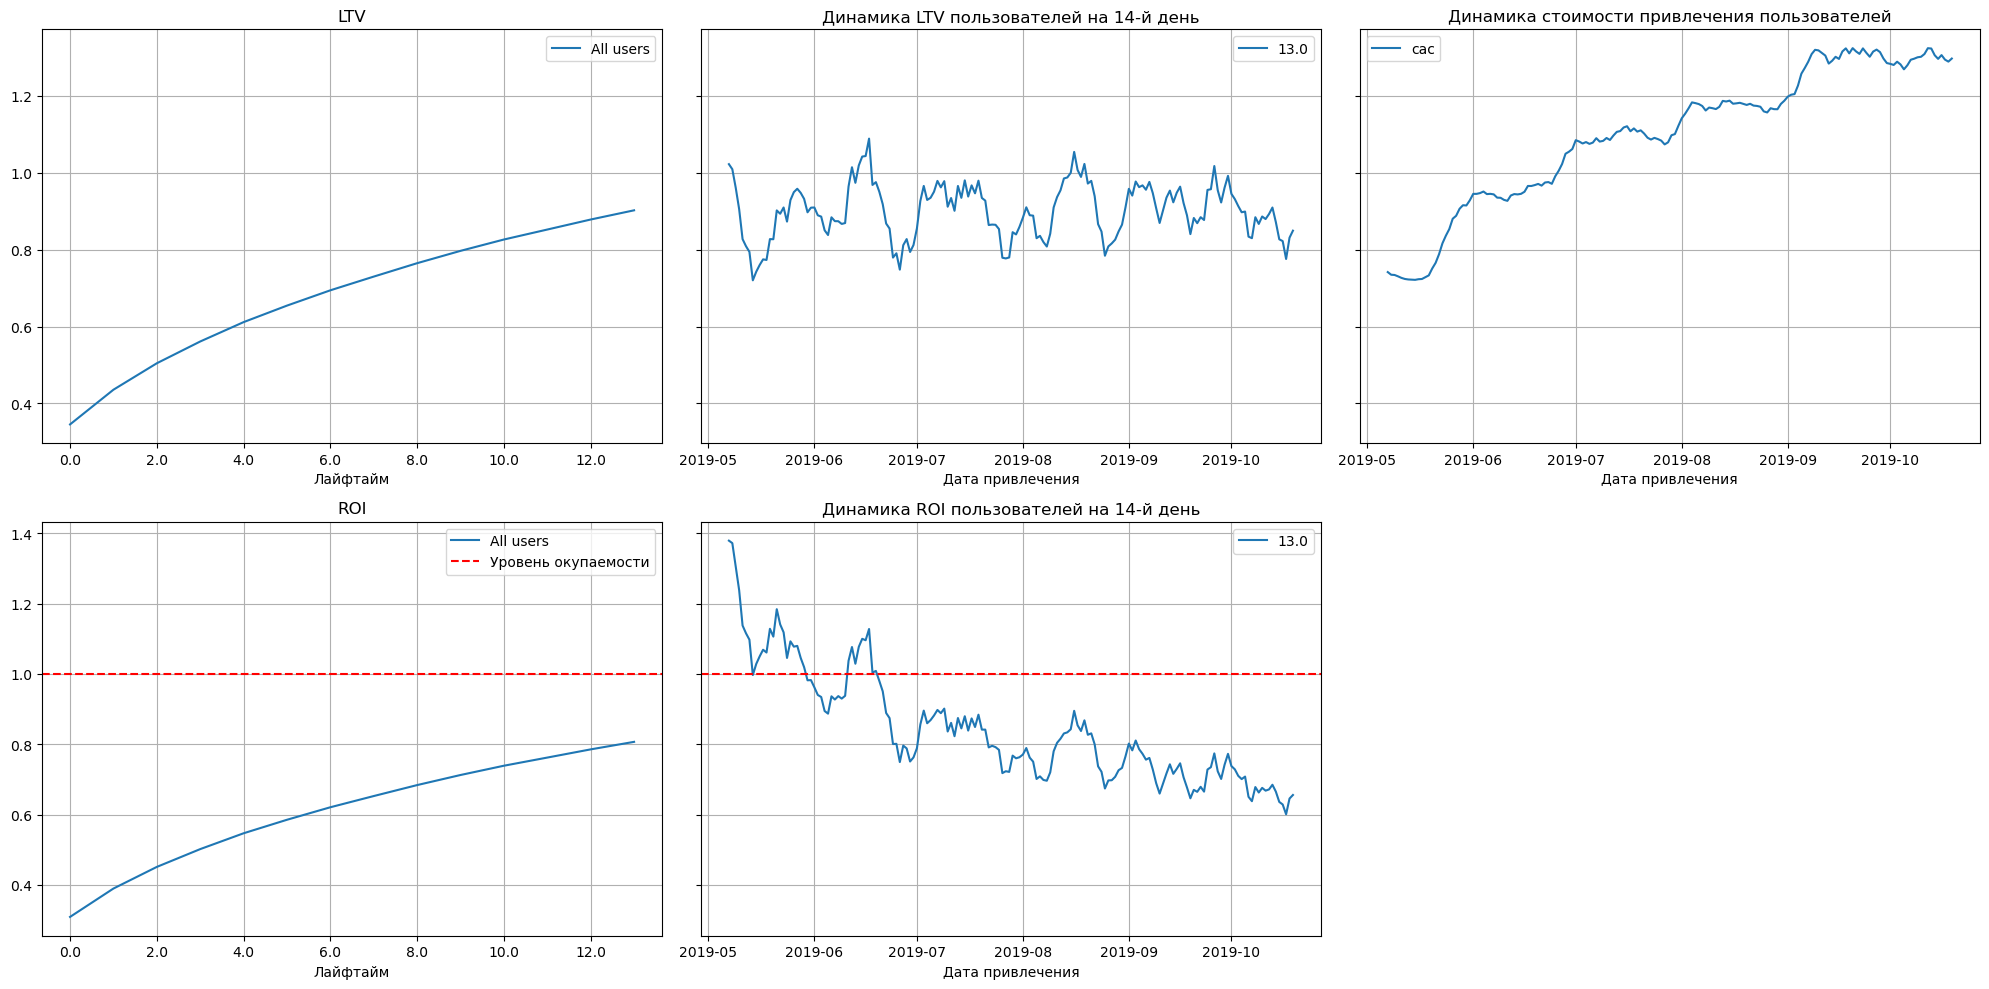

In [32]:
# Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

ltv_results = get_ltv(
    profiles = filtered_profiles,
    purchases = orders,
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions = [],
    ignore_horizon = False
)

result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = ltv_results

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon=horizon_days)

**ВЫВОДЫ**

1. **LTV**: График показывает, что LTV со временем увеличивается, что указывает на то, что со временем пользователи приносят больше дохода. Это хороший знак, так как он говорит о том, что стоимость пользователя растет со временем, и инвестиции в привлечение со временем приносят больший эффект.

2. **CAC**: В первый месяц наблюдается активный рост CAC, что может быть связано с активной рекламной кампанией или повышенной конкуренцией на рынке. В дальнейшем динамика CAC стабилизируется, что может указывать на налаживание процесса привлечения пользователей и оптимизацию затрат.

3. **ROI**: ROI ниже уровня окупаемости! Инвестиции в рекламу не окупаются.

### Анализ конверсии и удержания пользователей и динамики их изменения

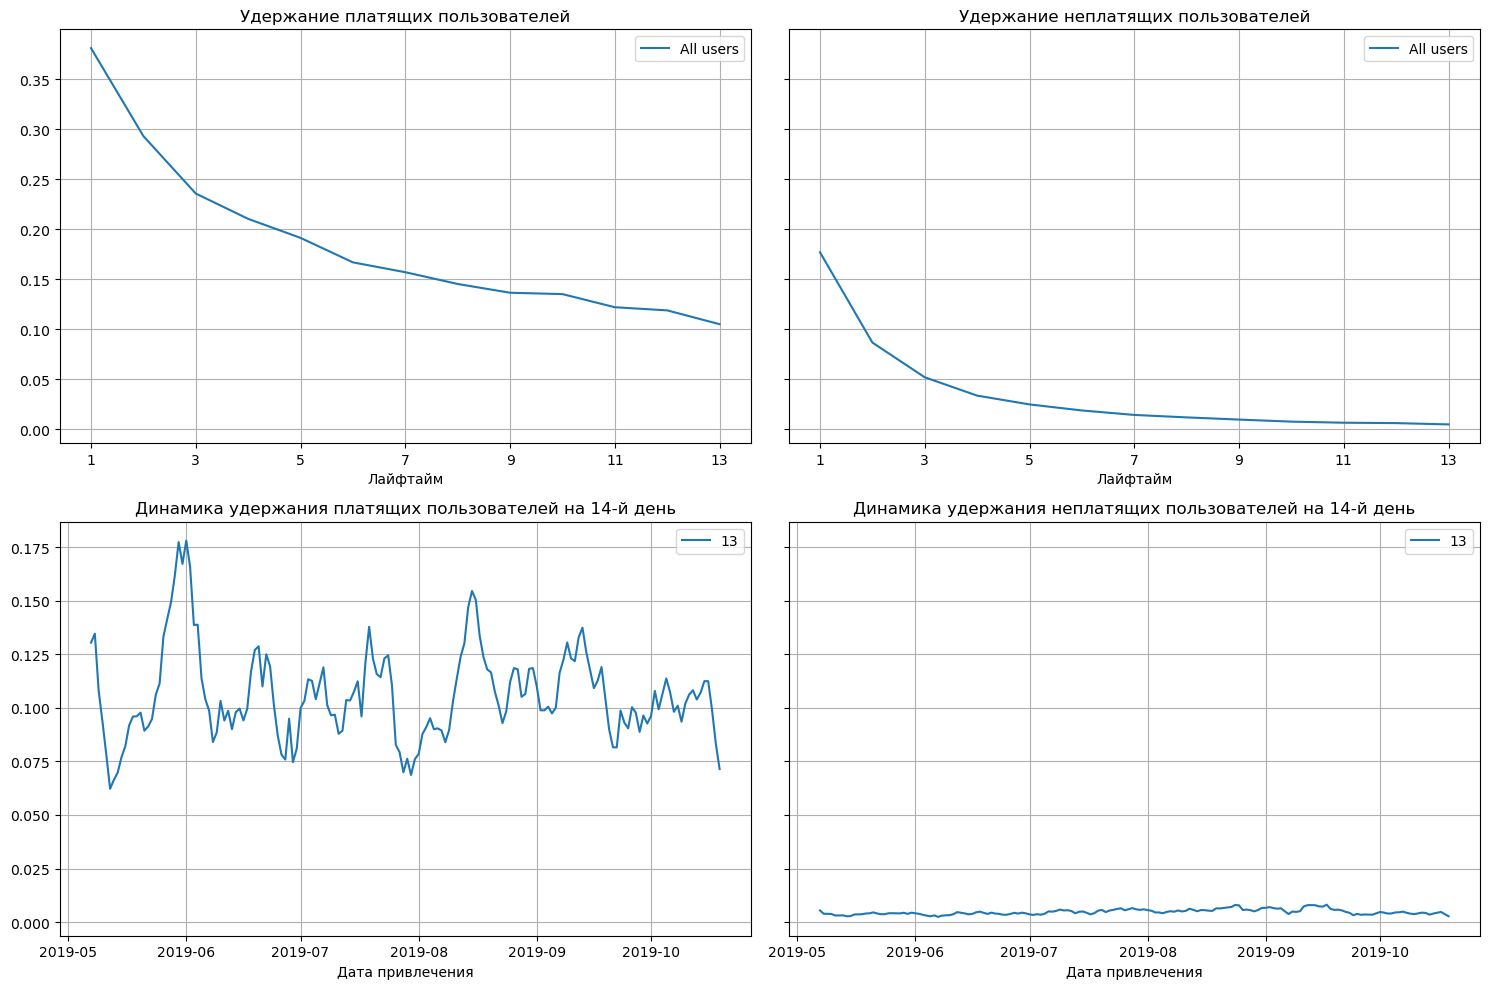

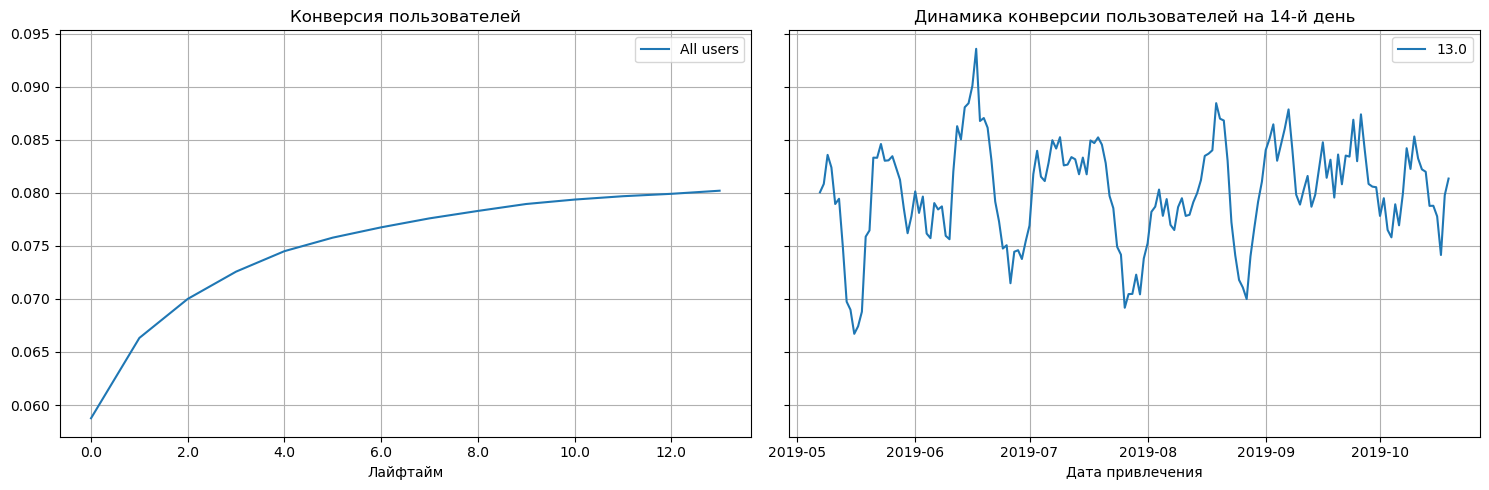

In [33]:
# Анализ конверсии и удержания пользователей и динамики их изменения

# Расчет удержания
retention_data, retention_grouped, retention_in_time = get_retention(
    profiles=filtered_profiles,
    sessions=visits,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=[],
    ignore_horizon=False
)

# Расчет конверсии
conversion_data, conversion_grouped, conversion_in_time = get_conversion(
    profiles=filtered_profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=[],
    ignore_horizon=False
)

plot_retention(retention_grouped, retention_in_time, horizon=horizon_days)
plot_conversion(conversion_grouped, conversion_in_time, horizon=horizon_days)

**ВЫВОДЫ**

**Удержание пользователей**

1. **Удержание платящих пользователей** уменьшается со временем, что является обычным для большинства бизнес-моделей. Самая высокая вероятность удержания наблюдается в начальный период после привлечения пользователя, после чего она постепенно снижается.

2. **Удержание неплатящих пользователей** также падает, но начальное значение удержания значительно ниже по сравнению с платящими пользователями. Это может означать, что пользователи, которые не совершили покупки, менее склонны оставаться с продуктом или услугой.

3. **Динамика удержания во времени** для платящих пользователей показывает колебания, что может указывать на влияние различных маркетинговых кампаний, сезонности или внешних событий. Важно отметить, что в определенные периоды наблюдается повышение удержания, что может быть результатом эффективных стратегий удержания или промоакций.

4. Для **неплатящих пользователей динамика удержания** практически не изменяется со временем, оставаясь на низком уровне. Это может указывать на то, что для неплатящих пользователей не применяются или не работают стратегии по повышению удержания.

**Конверсия пользователей**

1. **Конверсия пользователей** показывает, что с течением времени шанс того, что пользователь совершит покупку, возрастает. Это может отражать эффективное вовлечение пользователей и убеждение их в ценности продукта.

2. **Динамика конверсии пользователей во времени** колеблется, что, как и в случае с удержанием, может быть связано с различными маркетинговыми инициативами, событиями или изменениями в продукте.

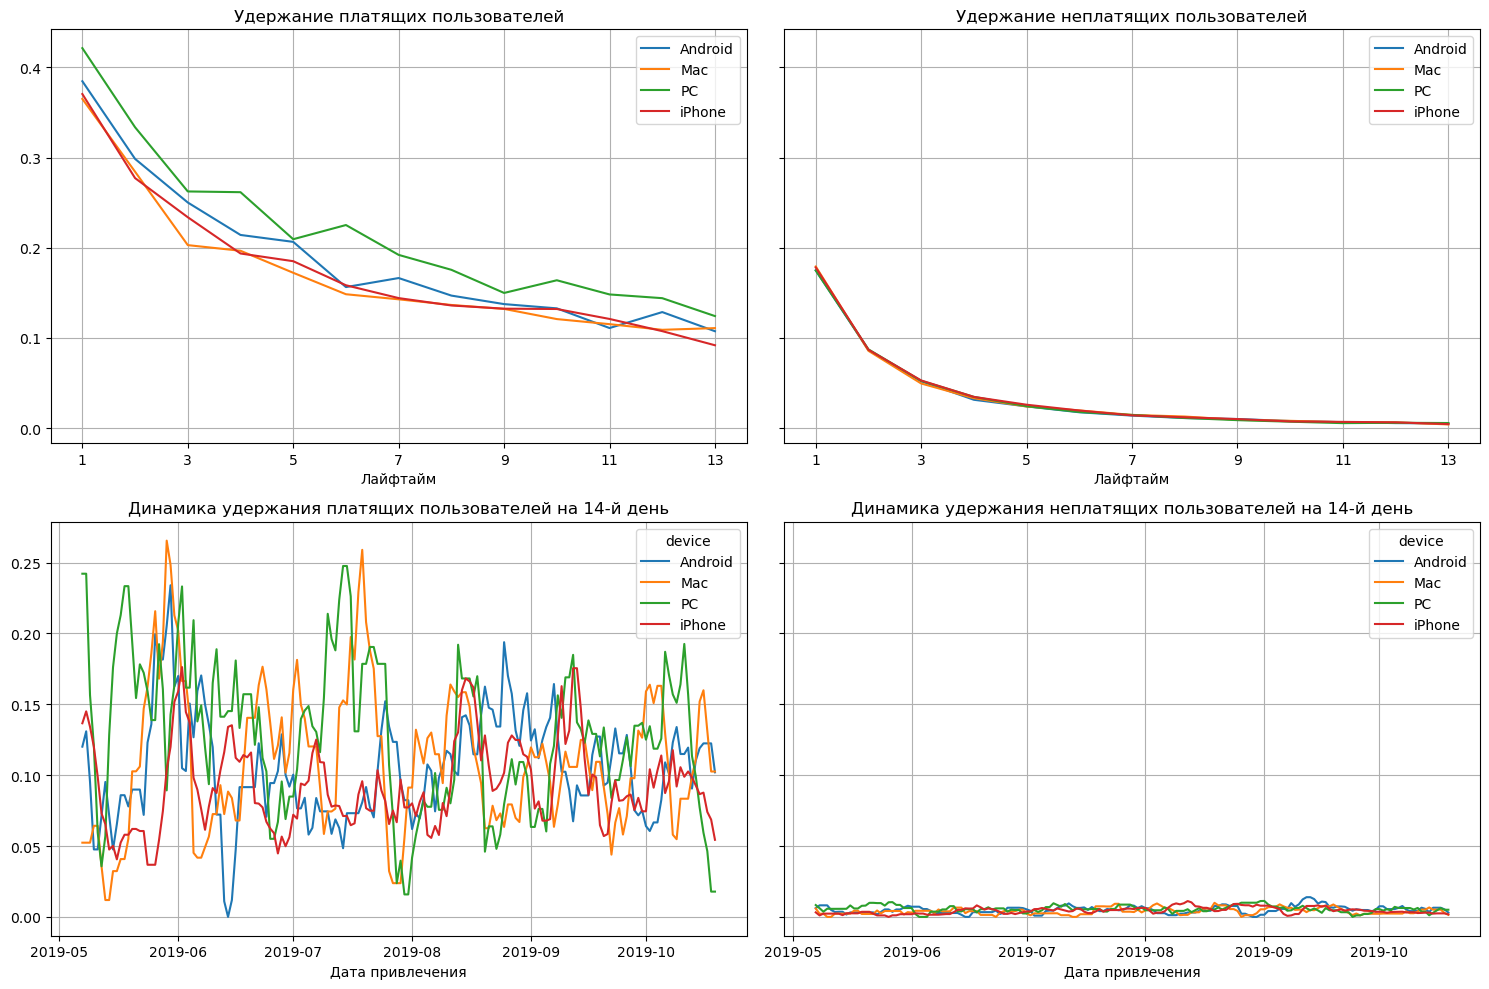

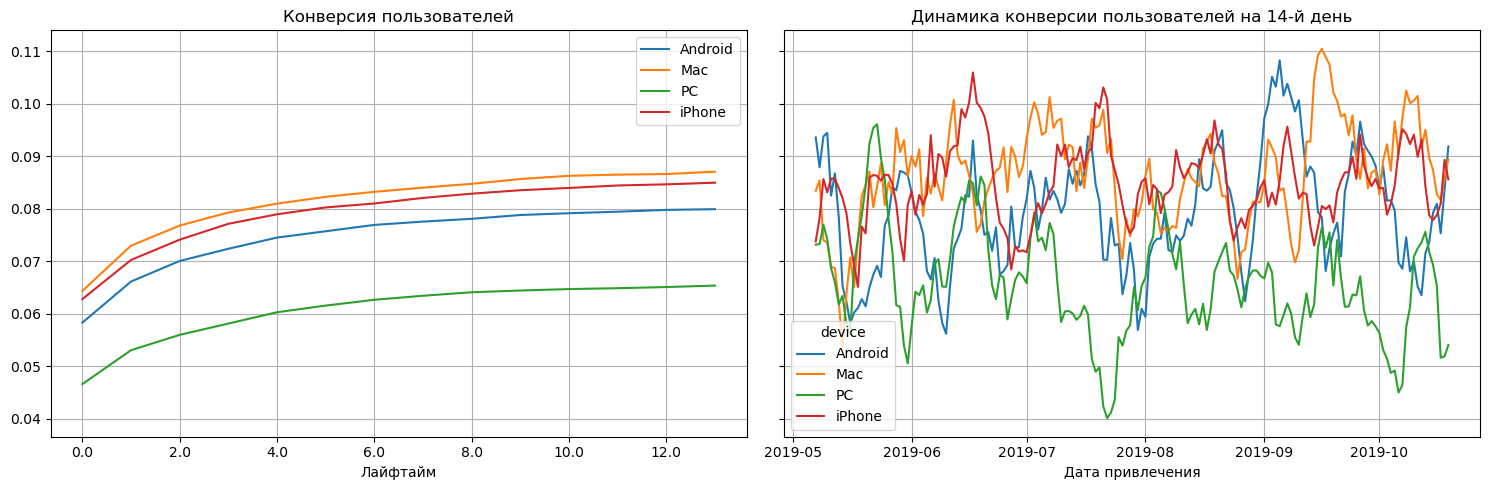

In [34]:
# Анализ конверсии и удержания пользователей и динамики их изменения

# Расчет удержания
retention_data, retention_grouped, retention_in_time = get_retention(
    profiles=filtered_profiles,
    sessions=visits,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['device'],
    ignore_horizon=False
)

# Расчет конверсии
conversion_data, conversion_grouped, conversion_in_time = get_conversion(
    profiles=filtered_profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['device'],
    ignore_horizon=False
)

plot_retention(retention_grouped, retention_in_time, horizon=horizon_days)
plot_conversion(conversion_grouped, conversion_in_time, horizon=horizon_days)

**ВЫВОДЫ**

**Удержание платящих пользователей**

- **PC** показывает самые высокие показатели удержания среди всех устройств, что указывает на то, что пользователи PC могут быть более лояльными или довольными продуктом.
- **Mac** и **Android** имеют примерно схожие, но немного более низкие показатели удержания по сравнению с PC.
- **iPhone** начинает с высокого уровня удержания, но затем показывает снижение, которое со временем становится более выраженным.

**Удержание неплатящих пользователей**

Все платформы показывают схожие и относительно низкие показатели удержания, что может свидетельствовать о том, что неплатящие пользователи менее вовлечены вне зависимости от используемого устройства.

**Динамика удержания платящих пользователей по устройствам за 14-й день**

Все устройства демонстрируют более высокую волатильность в удержании, с различными всплесками и падениями, что может отражать влияние временных акций, сезонных факторов или изменений в пользовательском опыте.

**Динамика удержания неплатящих пользователей по устройствам за 14-й день**

Все устройства показывают очень низкие и стабильные показатели удержания с незначительными колебаниями. Это подчеркивает, что удержание неплатящих пользователей является сложной задачей независимо от устройства.

**Конверсия пользователей по устройствам**

- **Mac** начинает с самой высокой конверсии и показывает плавное увеличение, что может свидетельствовать о сильном начальном взаимодействии, которое продолжает расти со временем.
- **iPhone** и **Android** начинают с промежуточных уровней конверсии и демонстрируют постепенное увеличение, что может указывать на то, что пользователи этих устройств становятся более вовлеченными по мере прохождения времени.
- **PC** имеет самую низкую начальную конверсию, но затем показывает увеличение, что может отражать замедленное принятие решения о покупке или более длительное время ознакомления с продуктом перед совершением покупки.

**Динамика конверсии пользователей по устройствам за 14-й день**

Положение линий колебания конверсии по устройствам соответствует общей картине конверсии по устройствам.

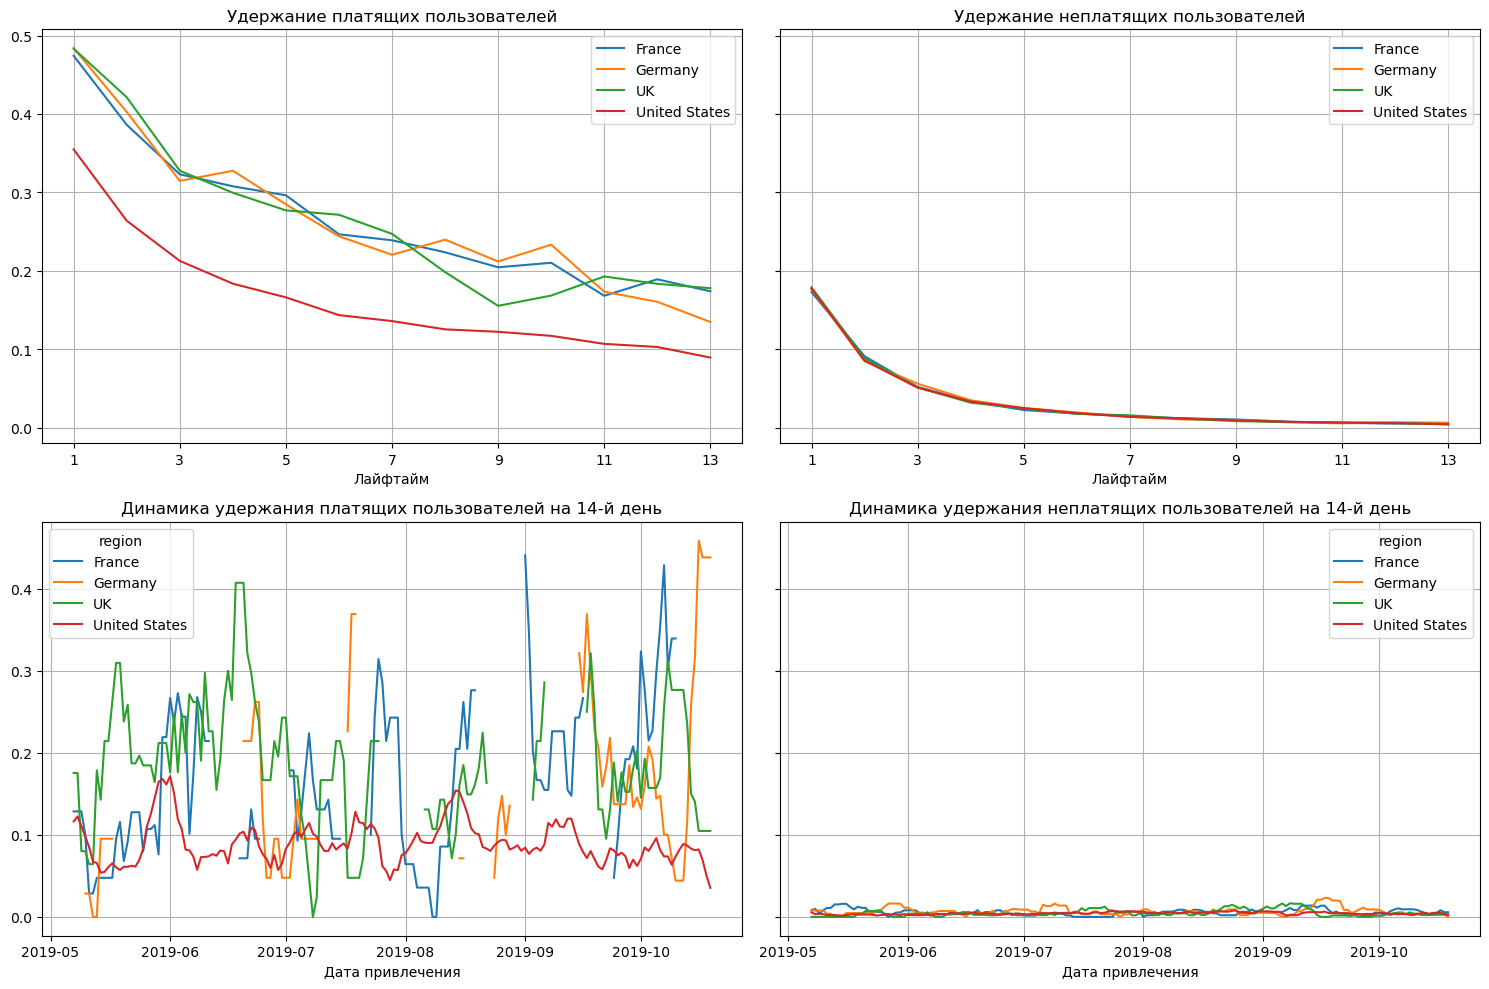

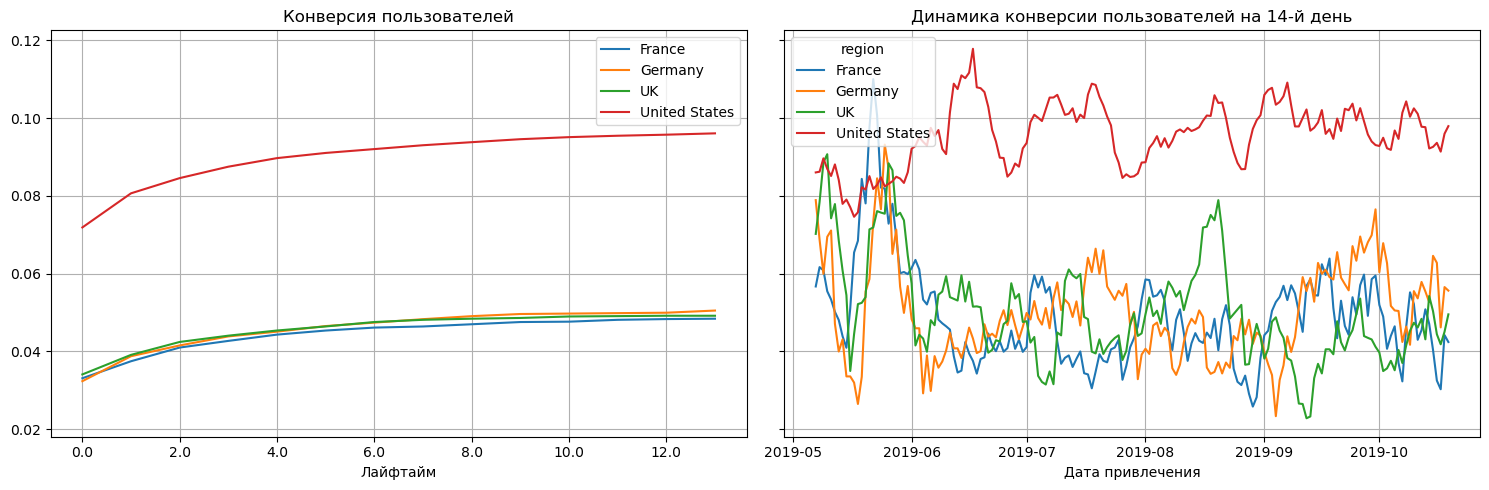

In [35]:
# Анализ конверсии и удержания пользователей и динамики их изменения

# Расчет удержания
retention_data, retention_grouped, retention_in_time = get_retention(
    profiles=filtered_profiles,
    sessions=visits,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['region'],
    ignore_horizon=False
)

# Расчет конверсии
conversion_data, conversion_grouped, conversion_in_time = get_conversion(
    profiles=filtered_profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['region'],
    ignore_horizon=False
)

plot_retention(retention_grouped, retention_in_time, horizon=horizon_days)
plot_conversion(conversion_grouped, conversion_in_time, horizon=horizon_days)

**ВЫВОДЫ**

**Удержание платящих пользователей**

США показывают самое слабое удержание пользователей, в то время как европейские страны сопоставимы друг с другом и примерно на 0.1 выше США в удержании.

**Удержание неплатящих пользователей**

Все страны показывают очень низкие и схожие показатели удержания неплатящих пользователей, что подчеркивает общую тенденцию низкой вовлеченности неплатящих пользователей.

**Динамика удержания платящих пользователей по странам за 14-й день**

Отмечается волатильность в удержании платящих пользователей во всех странах, с особыми пиками и спадами, что может отражать влияние маркетинговых кампаний, национальных праздников или экономических событий в каждой стране.

**Конверсия пользователей по странам**

США показывают наибольшую конверсию с большим отрывом. Европейские страны имеют почти идентичную конверсию примерно на 0.04 ниже США.

**Динамика конверсии пользователей по странам за 14-й день**

Все страны показывают колебания в динамике конверсии, что может отражать различия в реакции на маркетинговые инициативы, сезонность или региональные особенности рынка, однако США сильно выделяется в лучшую сторону.

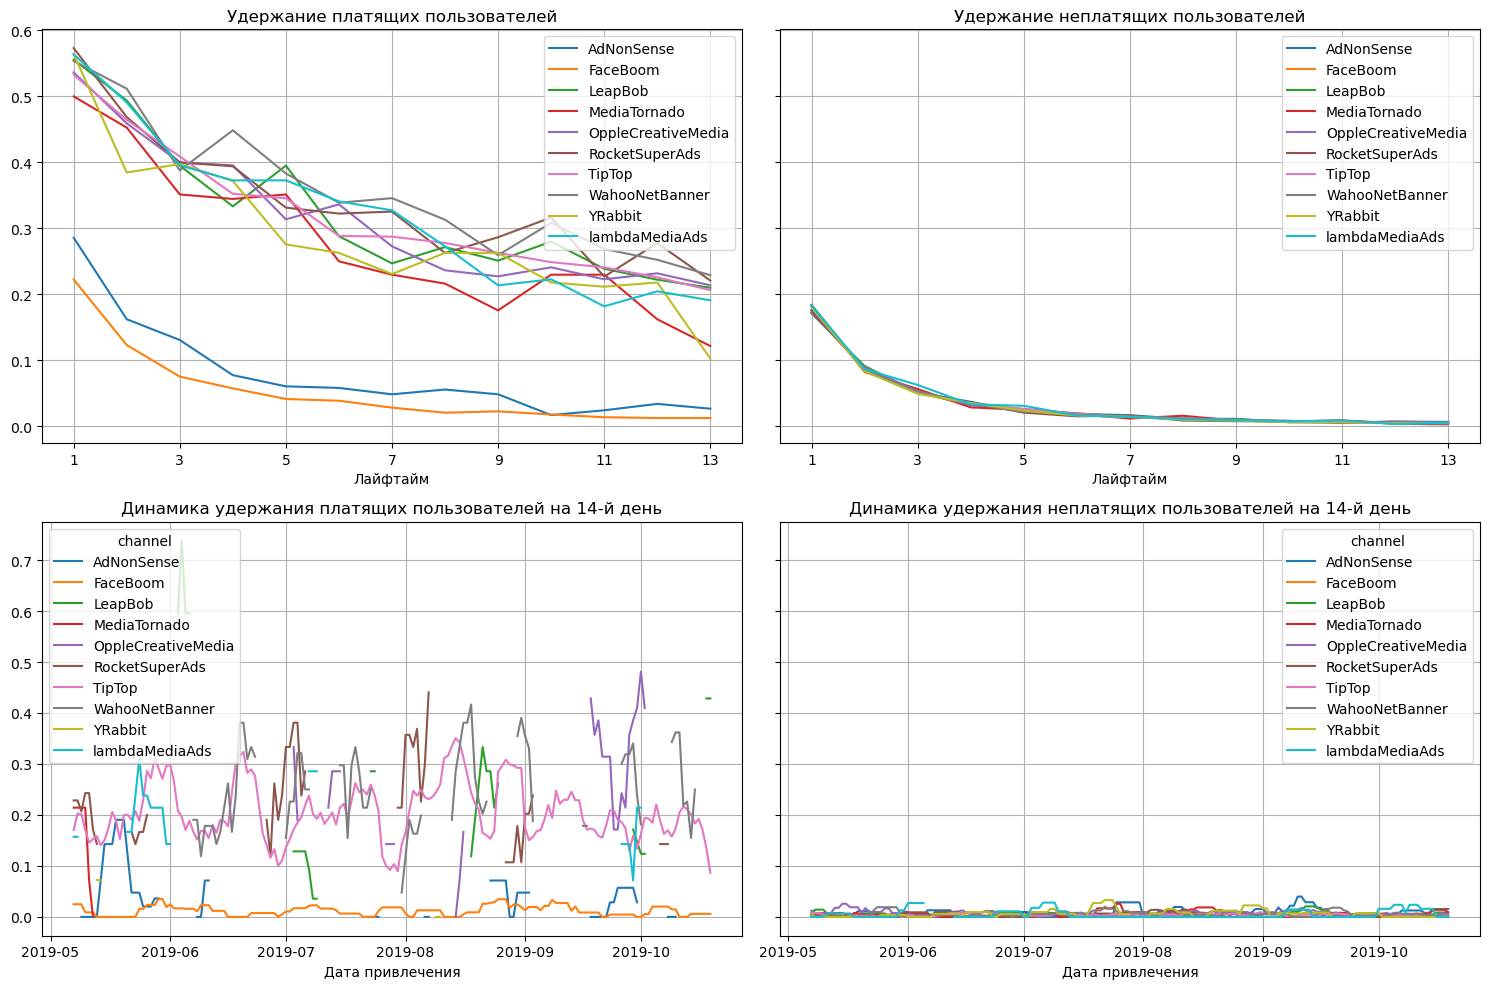

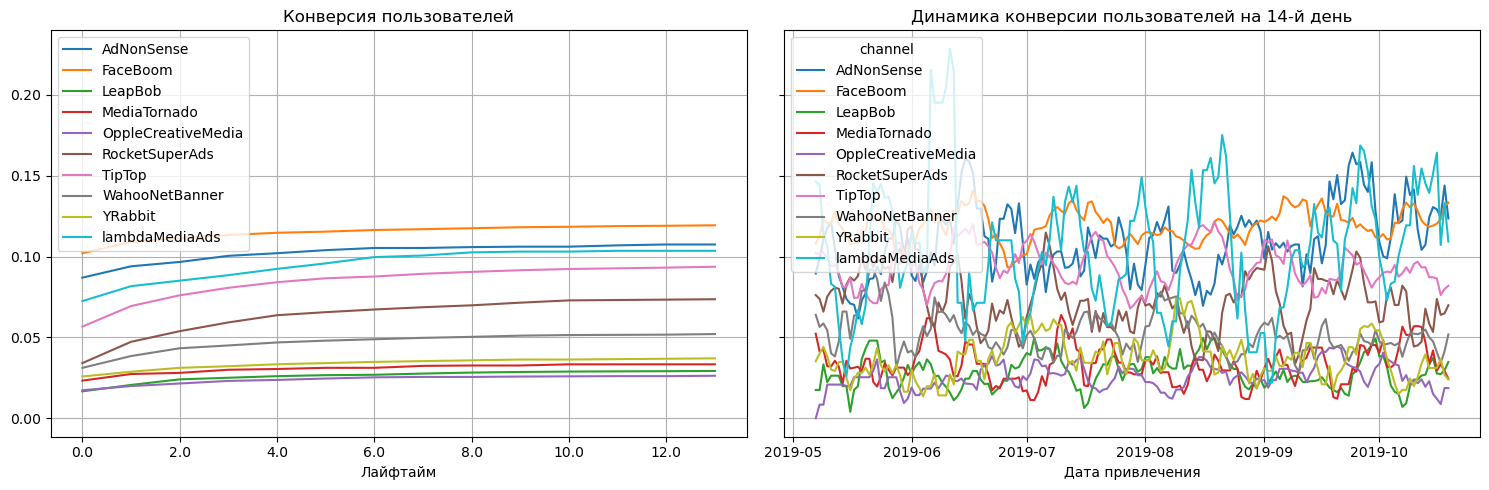

In [36]:
# Анализ конверсии и удержания пользователей и динамики их изменения

# Расчет удержания
retention_data, retention_grouped, retention_in_time = get_retention(
    profiles=filtered_profiles,
    sessions=visits,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['channel'],
    ignore_horizon=False
)

# Расчет конверсии
conversion_data, conversion_grouped, conversion_in_time = get_conversion(
    profiles=filtered_profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['channel'],
    ignore_horizon=False
)

plot_retention(retention_grouped, retention_in_time, horizon=horizon_days)
plot_conversion(conversion_grouped, conversion_in_time, horizon=horizon_days)

**ВЫВОДЫ**

**Удержание платящих пользователей**

FaceBoom и AdNonSense показывают самое слабое удержание пользователей, в то время как другие каналы сопоставимы друг с другом и примерно на 0.2 выше FaceBoom и AdNonSense в удержании.

**Удержание неплатящих пользователей**

Снова идентичное низкое удержание неплатящих пользователей.

**Динамика удержания платящих пользователей по каналам за 14-й день**

Только FaceBoom показывают слабую динамику низкого удержания. Остальные каналы сильно волатильны. Очень много пропусков в данных.

**Конверсия пользователей по каналам**

FaceBoom показывают наибольшую конверсию. AdNonSense и lambdaMeidaAds занимают второе и третье место по этому показателю.

**Динамика конверсии пользователей по каналам за 14-й день**

Все каналы показывают колебания в динамике конверсии, что может отражать различия в реакции на маркетинговые инициативы, сезонность, однако AdNonSense визуально иногда "выстреливает" лучше всех.

### Анализ окупаемости рекламы с разбивкой по устройствам

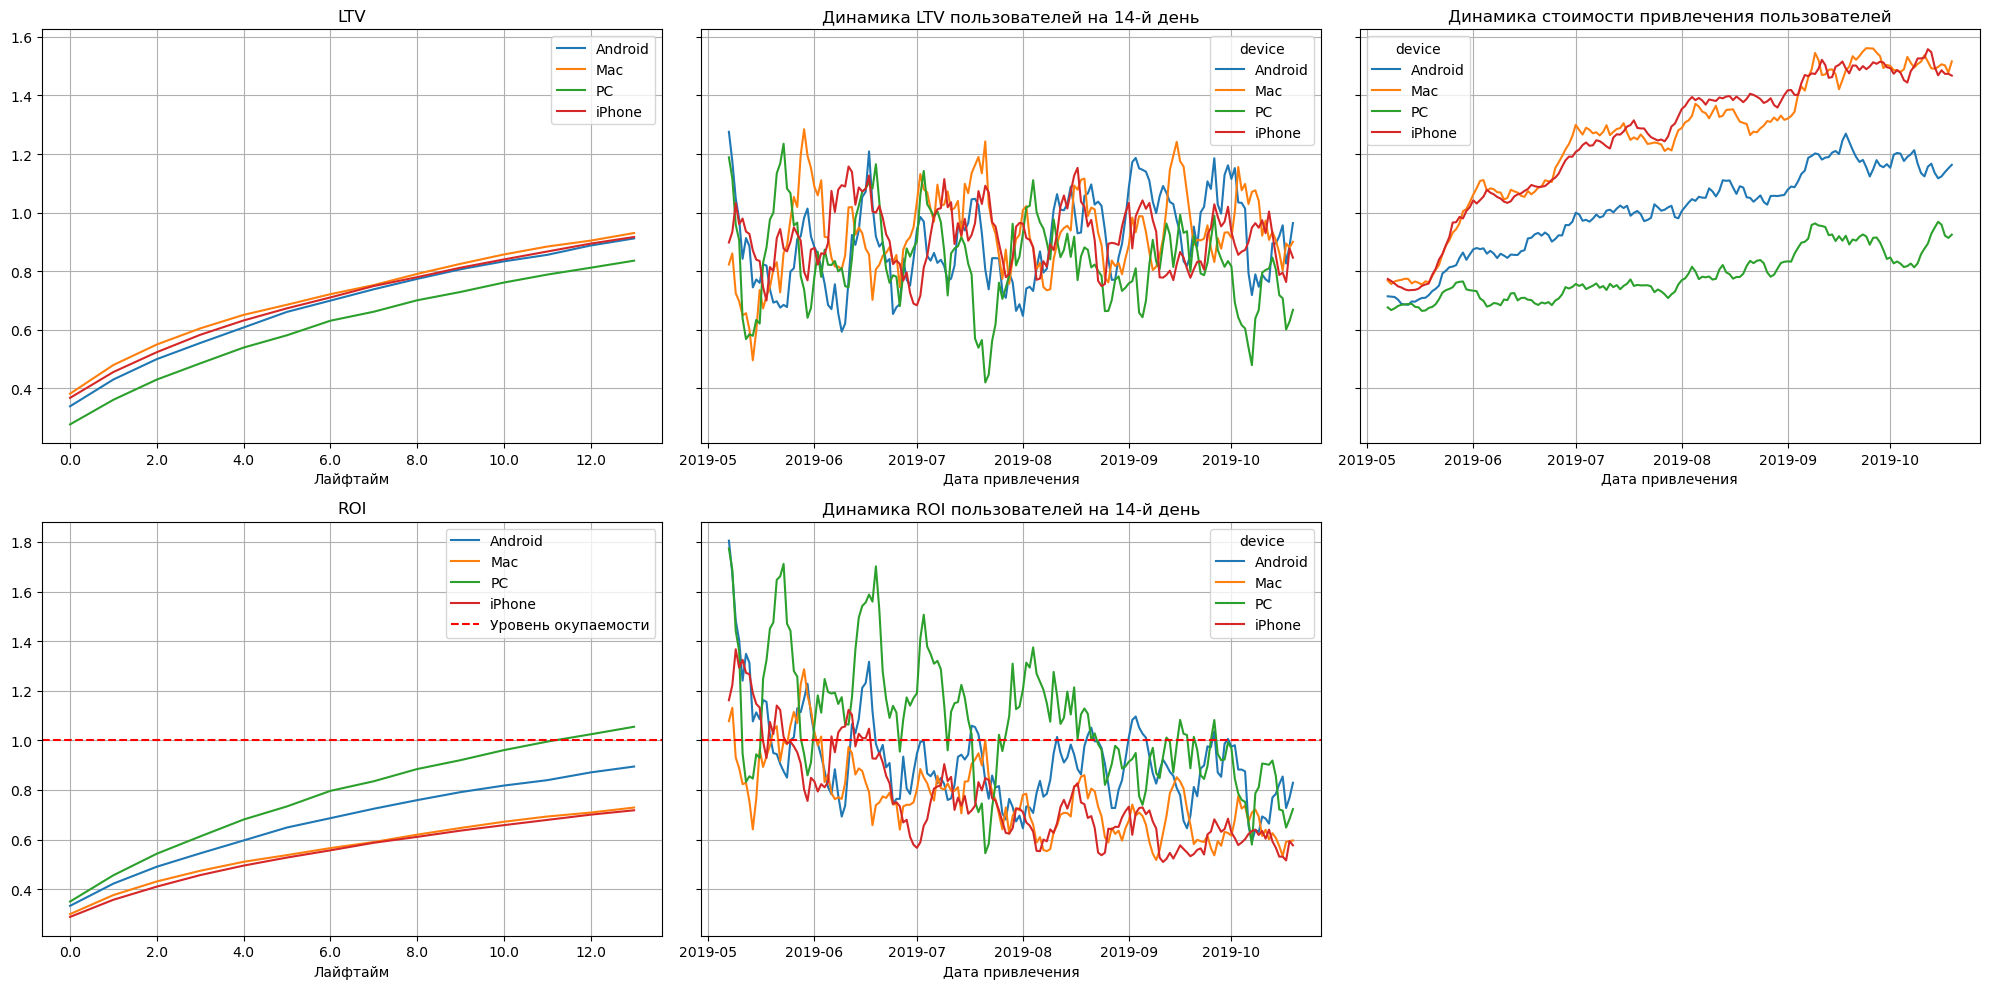

In [37]:
# Анализ окупаемости рекламы с разбивкой по устройствам

ltv_results = get_ltv(
    profiles=filtered_profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['device'],
    ignore_horizon=False
)

result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = ltv_results

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon=horizon_days)

**ВЫВОДЫ**

**LTV**: Реклама, ориентированная на пользователей iPhone, является более дорогой, но приносит немного более высокий LTV.

**ROI**: Реклама для пользователей PC показывает хороший уровень окупаемости.

**CAC**: CAC для устройств Apple является наивысшим.

### Анализ окупаемости рекламы с разбивкой по странам

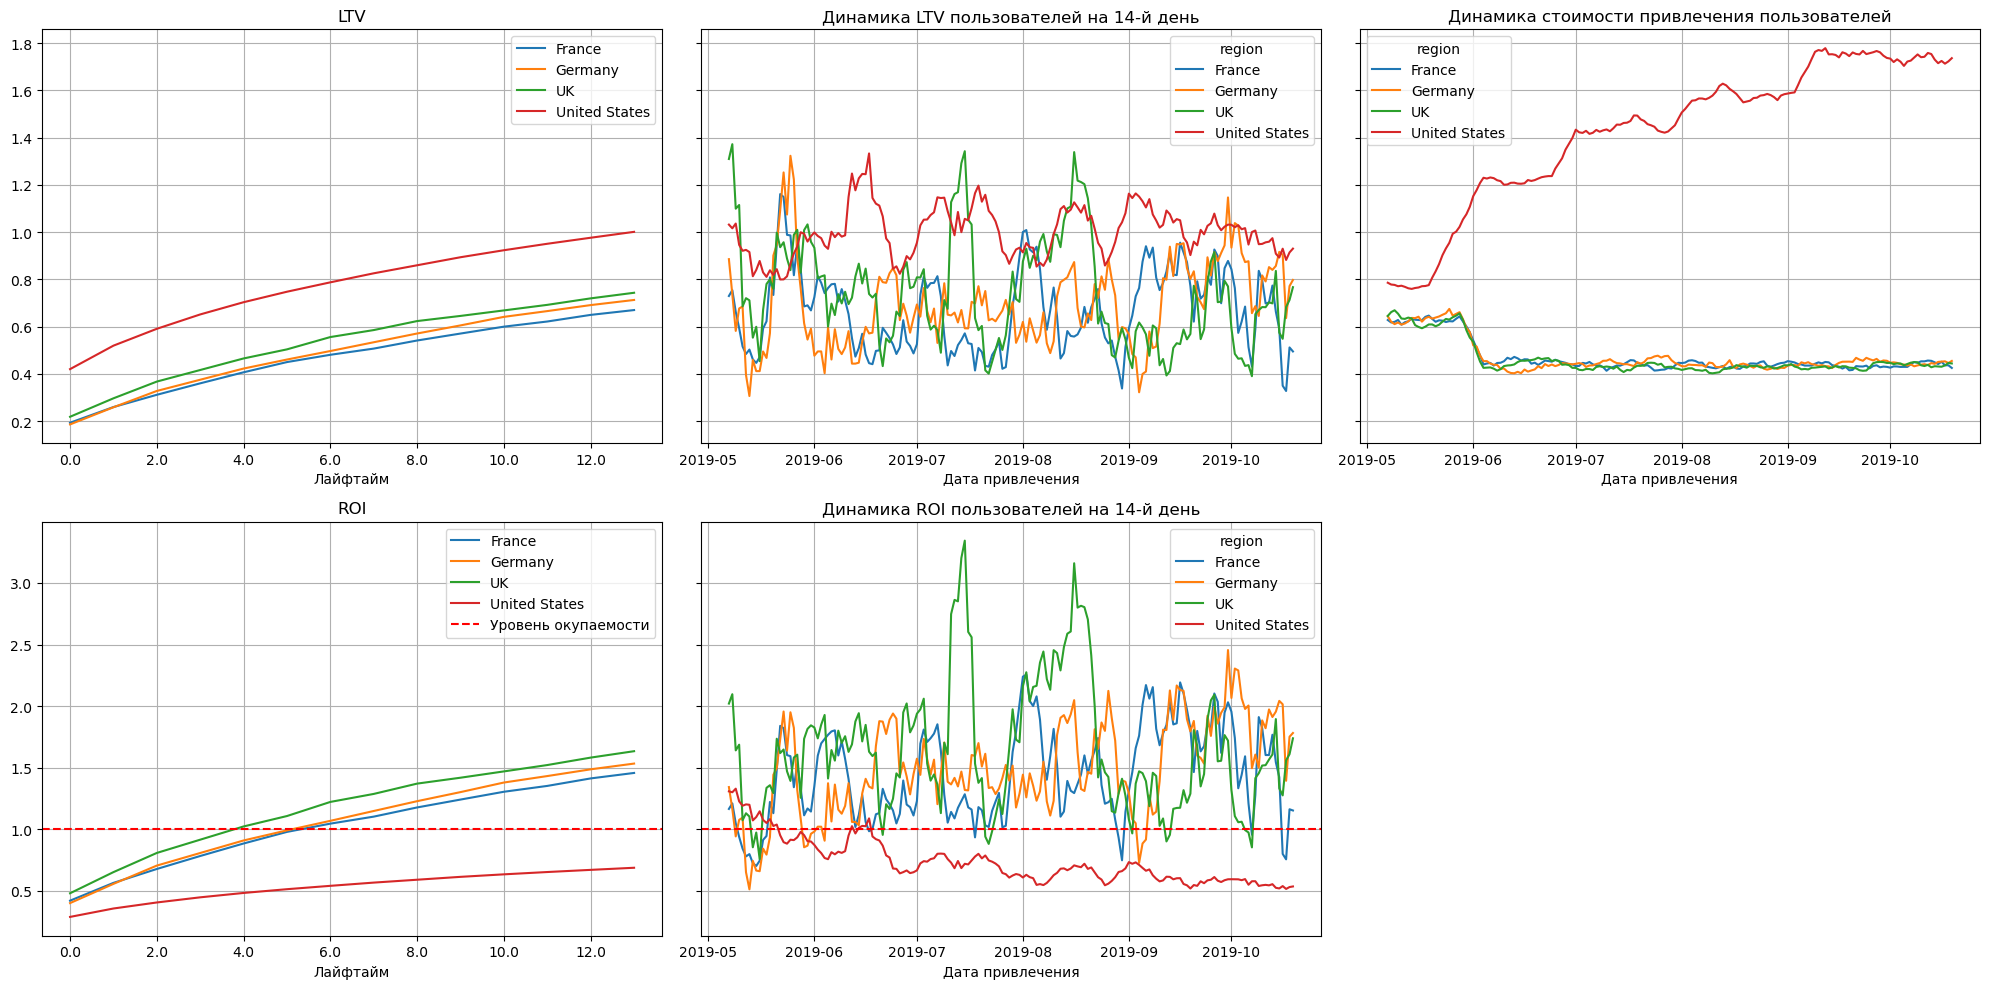

In [38]:
# Анализ окупаемости рекламы с разбивкой по странам

ltv_results = get_ltv(
    profiles=filtered_profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['region'],
    ignore_horizon=False
)

result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = ltv_results

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon=horizon_days)

**ВЫВОДЫ**

**LTV**: Удержание пользователей в США является наилучшим. Стоит учитывать цену, которую компания за это платит.

**CAC**: Стоимость привлечения пользователей в США дорожает с каждым месяцем и на момент конца рассматриваемого периода превышает стоимость привлечения пользователей в Европе в 4 раза!

**ROI**: Реклама в США окупается хуже, чем в Европе. Европейские страны примерно на 1 пт лучше по этому показателю.

### Анализ окупаемости рекламы с разбивкой по каналам рекламы

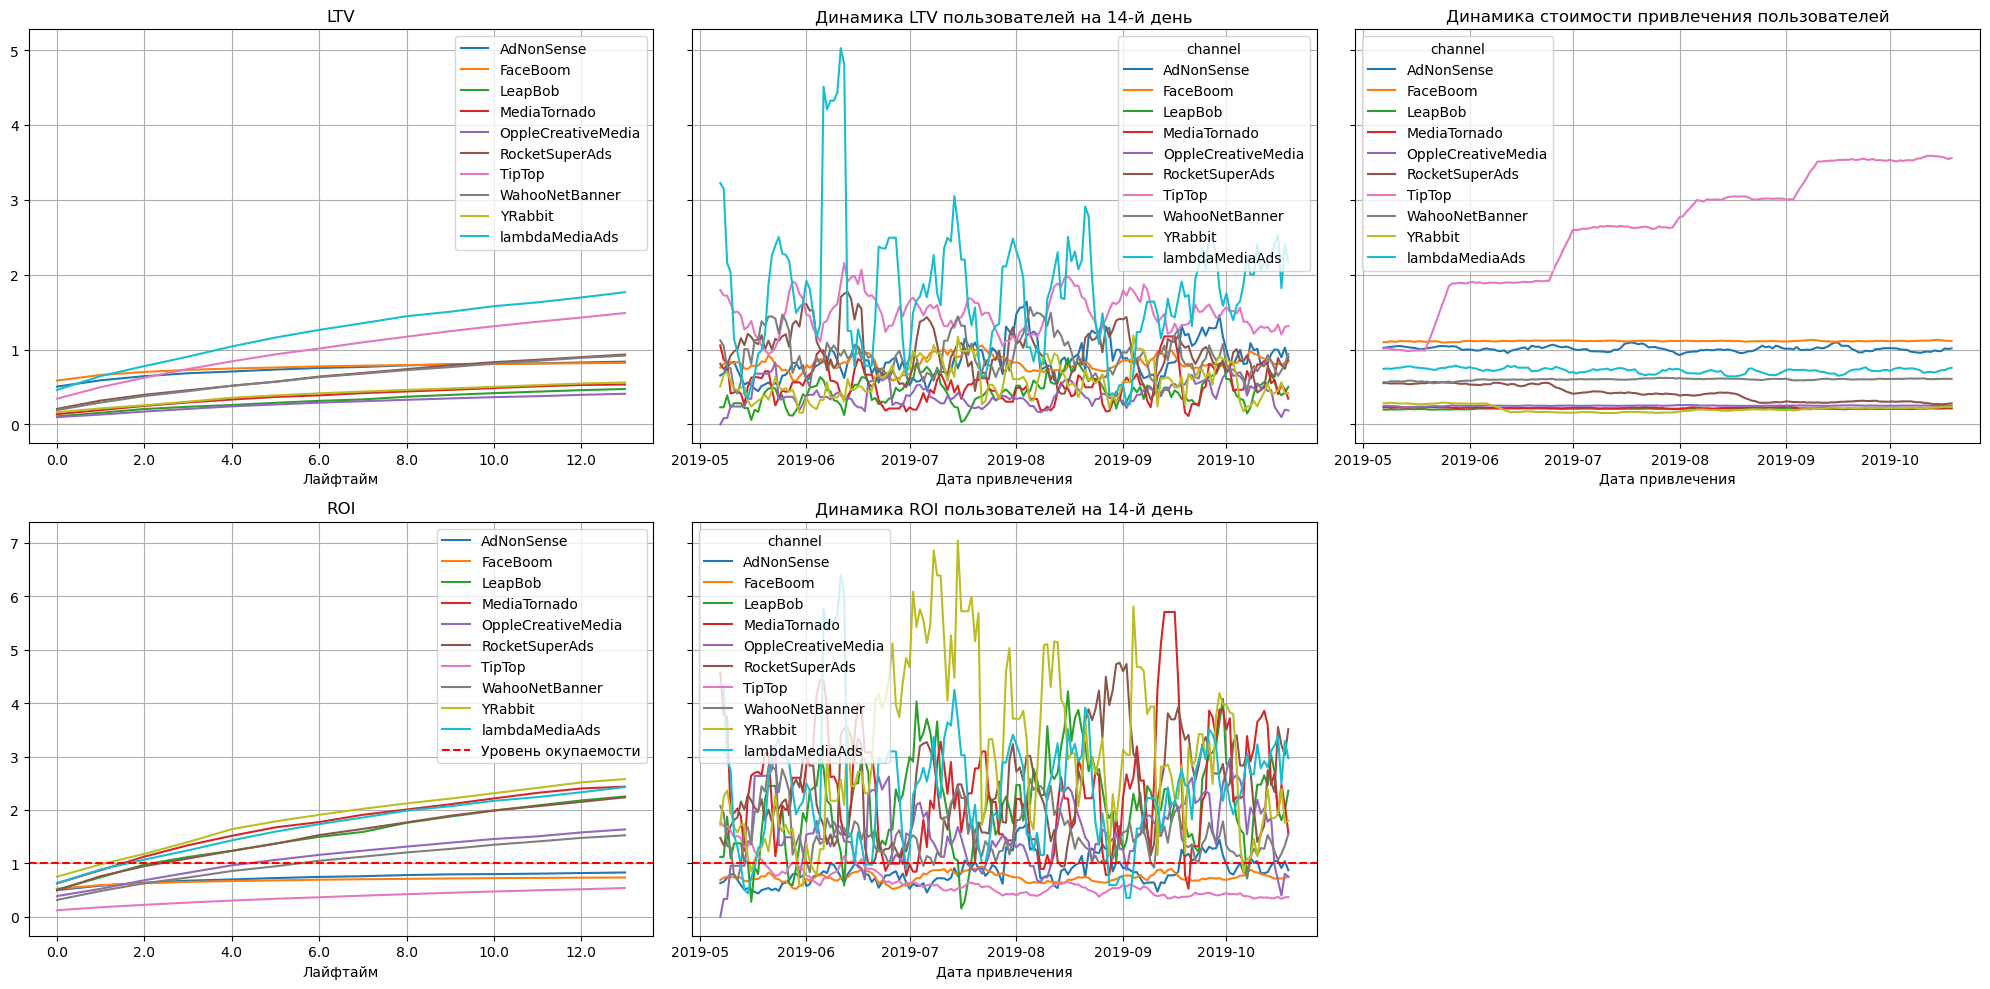

In [39]:
# Анализ окупаемости рекламы с разбивкой по каналам рекламы

ltv_results = get_ltv(
    profiles=filtered_profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['channel'],
    ignore_horizon=False
)

result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = ltv_results

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon=horizon_days)

**ВЫВОДЫ**
**LTV**: Все каналы показывают увеличение LTV со временем, но с разной степенью роста. Каналы, такие как TipTop и FaceBoom, показывают более высокий LTV, что может указывать на их большую эффективность или более дорогую аудиторию.

**CAC**: Канал TipTop имеет значительные всплески CAC, что может указывать на периоды высокой конкуренции или повышенных маркетинговых затрат.

**ROI**: Каналы TipTop, FaceBoom, AdNonSense не окупаются. Другие каналы демонстрируют ROI выше уровня окупаемости

**ВОПРОСЫ ИССЛЕДОВАНИЯ**

1. **Окупается ли реклама, направленная на привлечение пользователей в целом?**

Судя по графикам, общая окупаемость рекламы кажется низкой. Большинство каналов показывают ROI ниже точки окупаемости, что указывает на то, что в общем рекламные затраты не окупаются. Однако это усреднённая картина, и могут быть отдельные каналы или периоды, в которые реклама окупается.


2. **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**
   - **Устройства:** iPhone и Mac.
   - **Страны:** CША.
   - **Рекламные каналы:** TipTop, FaceBoom, AdNonSense.


3. **Чем могут быть вызваны проблемы окупаемости?**
   - **Неэффективная рекламная стратегия:** Например, рекламные объявления могут не привлекать внимание целевой аудитории или не приводить к конверсии.
   - **Высокая конкуренция и затраты:** Возможно, стоимость кликов увеличивается из-за большого количества конкурентов, особенно в популярных рекламных каналах.
   - **Неподходящая целевая аудитория:** Может быть, реклама не достигает тех пользователей, которые наиболее склонны к покупкам.
   - **Сезонные факторы:** Временные колебания в спросе или покупательской активности могут влиять на окупаемость в определенные периоды времени.
   - **Ограничения по качеству продукта/предложения:** Если продукт или предложение не соответствует ожиданиям рынка, это может снизить конверсию и удержание, а также увеличить стоимость привлечения клиентов.

## Выводы исследования

**Общий анализ окупаемости:**

- В целом, рекламные усилия оказались недостаточно эффективными, не достигая порога окупаемости в 100% к концу второй недели, с ROI около 80%.
- Показатель CAC демонстрирует непостоянство, указывая на возрастающие расходы на рекламу во времени.
- Стабильность LTV подсказывает, что снижение окупаемости не связано с ухудшением качества привлекаемых пользователей.
- С июля наблюдается заметное снижение ROI, что требует дополнительного анализа причин и корректировки стратегии.

**Анализ по устройствам:**

- Пользователи Mac и iPhone показывают ухудшение показателей окупаемости после июня, требуя особого внимания, так как стоимость привлечения этих групп пользователей возрастает, а их ROI снижается.
- Пользователи PC демонстрируют лучшее удержание и высокую окупаемость, в то время как пользователи Mac и iPhone требуют дополнительных усилий для улучшения этих показателей.

**Анализ по странам:**

- Рекламные кампании в США оказались наименее окупаемыми, и стоимость привлечения пользователей там самая высокая.
- Великобритания и Германия выделяются как рынки с высокой окупаемостью, что делает их приоритетными направлениями для инвестиций в рекламу.
- Следует уделить дополнительное внимание рынку США для определения факторов, повлиявших на падение окупаемости и рост стоимости привлечения, и принятия мер.

**Анализ по каналам:**

- Наблюдается избыточное вложение в рекламный канал TipTop, который не оправдал ожиданий по окупаемости, указывая на необходимость пересмотра бюджетов.
- Каналы LeapBop, FaceBoom и TipTop показывают низкую окупаемость, что сигнализирует о потребности в их тщательной оценке и возможной корректировке стратегии вложений.
- Рекламная сеть YRabbit выделилась положительно в июле, что может указывать на потенциал для дополнительных инвестиций.
- Каналы FaceBoom и AdNonSense демонстрируют недостаточное удержание, требуя улучшения стратегий вовлечения и удержания клиентов.

**РЕКОМЕНДАЦИИ**

1. **Целевая оптимизация для пользователей Apple:**
   - Поиск способов снижения затрат и увеличения доходов от пользователей с устройствами Mac и iPhone, возможно, через специализированные предложения или программы лояльности, учитывая их высокую стоимость привлечения и текущее снижение ROI.


2. **Географическое перераспределение бюджета:**
   - Корректировка расходов на рекламу в США с учетом их низкой окупаемости при высоких затратах. Исследование причин снижения эффективности рекламных кампаний, особенно учитывая значительное падение после июня 2019 года.
   - Увеличение вложений в рекламу в Великобритании и Германии, где наблюдается более высокая окупаемость, для привлечения большего числа пользователей.


3. **Рекламные каналы и бюджетирование:**
   - Пересмотр выделения бюджета для рекламного канала TipTop, который демонстрирует чрезмерные затраты при недостаточной отдаче. Рассмотрение альтернативных каналов с лучшими показателями окупаемости.
   - Осмотрительное управление каналами LeapBop, FaceBoom и TipTop, где реклама показывает низкую окупаемость, возможно сокращение или перераспределение бюджета.
   - Анализ и улучшение стратегий удержания для каналов с низким уровнем удержания, таких как FaceBoom и AdNonSense, для увеличения их эффективности.